# Capstone Project -Time Series Forecasting
- Submitted by: Yubaraj Sahoo
- Date: 04/04/2021

## Problem Statement
The Rossman Drugstore has 3000 units across 7 different European Countries. Recently, store administrators have been predicting their sales daily six weeks in advance. However, Store sale factors are influenced by various things.  For example, promotions, competition, holidays, seasons, and locality all play a deciding factor. Currently with many managers predicting these sales based on a unique phenomenon the accuracy is quite varied and not dependable. 

Our goal is to analyze the historical data sets given and forecast the “Sales” column. Since the project just started, the range is reserved for only 9 key stores around Europe. These stores are associated with the numbers, - `1,3,8,9,13,25,29,31 and 46`.

Steps needed: – 
1.	Uncovering outliers at the 99th percentile and discarding them from the data set. 
2.	Standardize the customer and sales variables before modeling the data. 
3.	Examine the data for any non-stationary using the ADF test for sales.
4.	Determine if the data set is stationary.
5.	If the data set is stationary, then specification of Vector Autoregression Model in Levels is necessary. 
6.	If the data set results in non-stationary, then specify the model based on differences
7.	Make sales, depending on promo2 and any other variables you think of as dependent variables in the given data set.
8.	Run a check for cointegration using the official Johansen test. 
9.	Find out Impulse Response Function necessary to answer the questions Q3- to Q7. 
10.	Predict/forecast sales 6 weeks ahead/in advance.


**The steps are broadly:**
1. Import required packages
1. Reading & Understanding Data
2. Data Cleaning
3. Exploratory Data Analysis (EDA)
4. Outlier Treatment
5. Data Preparation
6. Build and evaluate time series forecast
8. Model Evaluation
9. Final Future model prediction
9. Conclusion

# 1. Import required packages

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
#from numpy import mean
from datetime import date, datetime
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import time

# visulaisation
from matplotlib import pyplot as plt
from matplotlib.pyplot import xticks
from pylab import rcParams
%matplotlib inline

import seaborn as sns
sns.set(style = "ticks") # to format into seaborn 
color_list = ["orange","blue","green","red","purple","brown","pink","gray","olive","cyan",]
c = '#386B7F' # basic color for plots

# Import Statsmodels
import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew, norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import coint
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

from collections import Counter
from sklearn.impute import KNNImputer
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox

#Setting seed
seed = 42

#Code to show all columns of dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# 2. Reading & Understanding Data

Let's first have a look at the dataset and understand the size, attribute names etc.

**Note:** We have used the following data sets for the Sales forecasting. 1) `train.csv` and 2) `store.csv`

In [2]:
# importing train data to learn
df_train = pd.read_csv("/Users/yubrajsahoo/Desktop/Time Series Forecasting/train.csv", 
                    parse_dates = True, low_memory = False, index_col = 'Date')
df_train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [4]:
# first glance at the train set: head and tail
print("In total: ", df_train.shape)
df_train.head(5).append(df_train.tail(5))

In total:  (1017209, 8)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   
2013-01-01   1111          2      0          0     0      0            a   
2013-01-01   1112          2      0          0     0      0            a   
2013-01-01   1113          2      0          0     0      0            a   
2013-01-01   1114          2      0          0     0      0            a   
2013-01-01   1115          2      0          0     0      0            a   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2013-01-01              1  
2013-01-01              1  
2013-01-01              1  
2013-01-01              1  
2013-01-01              1

#### Inference

- Sales: the turnover for any given day (target variable).
- Customers: the number of customers on a given day.
- Open: an indicator for whether the store was open: 0 = closed, 1 = open.
- Promo: indicates whether a store is running a promo on that day.
- StateHoliday: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays.
- SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools.

We are dealing with time-series data so it will probably serve us to extract dates for further analysis. We also have two likely correlated variables in the dataset, which can be combined into a new feature.

In [5]:
## Reading store data
df_store = pd.read_csv("/Users/yubrajsahoo/Desktop/Time Series Forecasting/store.csv", 
                    low_memory = False)

In [6]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [7]:
# first glance at the store set: head and tail
print("In total: ", df_store.shape)
df_store.head(5).append(df_store.tail(5))

In total:  (1115, 10)


Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
1         2         a          a                570.0   
2         3         a          a              14130.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
1110   1111         a          a               1900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   
1114   1115         d          c               5350.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
1                          11.0                    2007.0       1   
2                          12.0                    2006.0       1   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
1110                        6.0                    2014.0       1   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   
1114                        NaN                       NaN       1   

      Promo2SinceWeek  Promo2SinceYear     PromoInterval  
0                 NaN              NaN               NaN  
1                13.0           2010.0   Jan,Apr,Jul,Oct  
2                14.0           2011.0   Jan,Apr,Jul,Oct  
3                 NaN              NaN               NaN  
4                 NaN              NaN               NaN  
1110             31.0           2013.0   Jan,Apr,Jul,Oct  
1111              NaN              NaN               NaN  
1112              NaN              NaN               NaN  
1113              NaN              NaN               NaN  
1114             22.0           2012.0  Mar,Jun,Sept,Dec

#### Inference

- Store: a unique Id for each store
- stereotype: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, November of any given year for that store

In [8]:
#checking duplicates Stores in the store data set.
print(sum(df_store.duplicated(subset = 'Store')) == 0)
# No duplicate values

True


# 3. Data Cleaning 

In this first section we go through the train and store data, handle missing values and create new features for further analysis.

### 3.1 User defined functions to use during Data Cleaning 

In [9]:
## create a generic function to remove rows or columns based on parameter provided 
def removeNulls(dataframe , axis=1, percentage=0.3):
    '''
    it will remove rows or columns based on the input provided 
    dataframe = name of dataframe 
    axis =1 default for columns , if rows are required we would need to pass 0 
    
    default percentage check is 30%
    
    '''
    df= dataframe.copy()
    ishape = df.shape
    if axis==0:
        rownames= df.transpose().isnull().sum()
        rownames= list(rownames[rownames.values > percentage*len(df)].index)
        print(rownames)
        df.drop(df.index[rownames],inplace=True)
        print("\nNumber of Rows dropped\t: ",len(rownames))
    else:
        colnames=(df.isnull().sum()/len(df))
        colnames = list(colnames[colnames.values>=percentage].index)
        print(colnames)
        df.drop(labels = colnames,axis =1,inplace=True)   
        print("\nNumber of Columns dropped\t: ",len(colnames))
    
    print("\n Previous Shape -",ishape,"\n New Shape",df.shape)
    return df

In [10]:
def monthToNum(date):
    return{'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sept': 9, 
            'Oct': 10, 'Nov': 11, 'Dec': 12}[date]

### 3.2 Inspect Null %
#### 3.2.1 Train data set

In [11]:
# Check the missing values in Train data set.
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
SchoolHoliday      0      0.0
StateHoliday       0      0.0
Promo              0      0.0
Open               0      0.0
Customers          0      0.0
Sales              0      0.0
DayOfWeek          0      0.0
Store              0      0.0

### Inference
No missing values in train data set. But we further investgate the data and will remove the unwanted records from the train data set.

In [12]:
# Inspect the columns counts.
# Value counts for each columns expect sales, customers and stores as we need to analysis these columns in separately.
cols = ['SchoolHoliday', 'StateHoliday', 'Promo', 'Open', 'DayOfWeek']

for i in cols:
    print(i, Counter(df_train[i]))

SchoolHoliday Counter({0: 835488, 1: 181721})
StateHoliday Counter({'0': 986159, 'a': 20260, 'b': 6690, 'c': 4100})
Promo Counter({0: 629129, 1: 388080})
Open Counter({1: 844392, 0: 172817})
DayOfWeek Counter({5: 145845, 4: 145845, 3: 145665, 2: 145664, 1: 144730, 7: 144730, 6: 144730})


#### 3.2.2 Store Data set

In [13]:
# Check the missing values in store data set.
total = df_store.isnull().sum().sort_values(ascending=False)
percent = round(df_store.isnull().sum()/df_store.isnull().count(),4).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

Total  Percent
PromoInterval                544   0.4879
Promo2SinceYear              544   0.4879
Promo2SinceWeek              544   0.4879
CompetitionOpenSinceYear     354   0.3175
CompetitionOpenSinceMonth    354   0.3175
CompetitionDistance            3   0.0027
Promo2                         0   0.0000
Assortment                     0   0.0000
StoreType                      0   0.0000
Store                          0   0.0000

### Inference
We have few variables with missing values that we need to deal with. Let's start with the `CompetitionDistance`.

In [14]:
# missing values in CompetitionDistance
df_store[pd.isnull(df_store.CompetitionDistance)]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

### Inference
Apperently this information is simply missing from the data. No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values (which is twice less that the average).

In [15]:
# fill NaN with a median value (skewed distribuion)
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace = True)

### Inference
Continuing further with missing data. What about `Promo2SinceWeek`? May it be that we observe unsusual data points?

In [16]:
# no promo = no information about the promo?
null_Promo2SinceWeek = df_store[pd.isnull(df_store.Promo2SinceWeek)]
null_Promo2SinceWeek[null_Promo2SinceWeek.Promo2 != 0]

Empty DataFrame
Columns: [Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []

### Inference
No, if there's no `Promo2` then there's no information about it. We can replace these values by zeros. The same goes for tha variables deducted from the competition, `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear`.

In [17]:
# replace NA's by 0
col = ['Promo2SinceYear', 'Promo2SinceWeek', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for i in col:
    df_store[i].fillna(0, inplace = True)

In [18]:
# Check the null % for high null values.
df = df_store.isnull().sum().reset_index(name='missing_cnt')
df.loc[df['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

index  missing_cnt
9  PromoInterval          544

### Inference
We are able to impute all columns except `PromoInterval`, we need to split this column value in to individual promo intervals

### Create derive variables for stores

In [19]:
#Split the PromoInterval.
s = df_store['PromoInterval'].str.split(',').apply(pd.Series, 1)
s.columns = ['PromoInterval0', 'PromoInterval1', 'PromoInterval2', 'PromoInterval3']
df_store = df_store.join(s)

In [20]:
df_store['PromoInterval0'] = df_store['PromoInterval0'].map(lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
df_store['PromoInterval1'] = df_store['PromoInterval1'].map(lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
df_store['PromoInterval2'] = df_store['PromoInterval2'].map(lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)
df_store['PromoInterval3'] = df_store['PromoInterval3'].map(lambda x: monthToNum(x) if str(x) != 'nan' else np.nan)

In [21]:
del df_store['PromoInterval']

In [22]:
df_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              0.0              0.0   
4                    2015.0       0              0.0              0.0   

   PromoInterval0  PromoInterval1  PromoInterval2  PromoInterval3  
0             NaN             NaN             NaN             NaN  
1             1.0             4.0             7.0            10.0  
2             1.0             4.0             7.0            10.0  
3             NaN             NaN             NaN             NaN  
4             NaN             NaN             NaN             NaN

In [23]:
# Check the null % for high null values.
df = df_store.isnull().sum().reset_index(name='missing_cnt')
df.loc[df['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

index  missing_cnt
9   PromoInterval0          544
10  PromoInterval1          544
11  PromoInterval2          544
12  PromoInterval3          544

### Inference
Since the promo interval has no promotion during that interval, hence we can impute this null values with 0.

In [24]:
# replace NA's by 0
col = ['PromoInterval0', 'PromoInterval1', 'PromoInterval2', 'PromoInterval3']
for i in col:
    df_store[i].fillna(0, inplace = True)

In [25]:
# Check the null % for high null values.
df = df_store.isnull().sum().reset_index(name='missing_cnt')
df.loc[df['missing_cnt']>0].sort_values('missing_cnt', ascending=False)

Empty DataFrame
Columns: [index, missing_cnt]
Index: []

In [26]:
#Inspect the data types
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval0             1115 non-null   float64
 10  PromoInterval1             1115 non-null   float64
 11  PromoInterval2             1115 non-null   float64
 12  PromoInterval3             1115 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage:

In [27]:
### Convert Storetype and Assortment to numerical categories
df_store['StoreType'] = df_store['StoreType'].astype('category').cat.codes
df_store['Assortment'] = df_store['Assortment'].astype('category').cat.codes

### Change the datatype in the data set for CompetitionDistance to Float.
df_store['CompetitionDistance'] = df_store['CompetitionDistance'].astype("float64")

In [28]:
df_store.shape

(1115, 13)

### 3.3 Train data set analysis

As per project scope we require to analyze the nine key stores, these stores are numbered - `1,3,8,9,13,25,29,31 and 46`. Hence we need to filter these records from the entire data set.

In [29]:
#Store list.
store_list = [1, 3, 8, 9, 13, 25, 29, 31, 46]
df_train = df_train[df_train['Store'].isin(store_list)]
print(Counter(df_train.Store))

Counter({1: 942, 3: 942, 8: 942, 9: 942, 25: 942, 29: 942, 31: 942, 13: 758, 46: 758})


### 3.3.1 Analyzing the following key factors in the train date set
- Store open with zero sales, 
- Store close with zero sales
- Active store with sales.

In [30]:
#Store open with zero sales,
zero_sales = df_train[(df_train.Open != 0) & (df_train.Sales == 0)]
print("In total: ", zero_sales.shape)
zero_sales.head(5)

In total:  (2, 8)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2014-02-13     25          4      0          0     1      0            0   
2014-02-12     25          3      0          0     1      0            0   

            SchoolHoliday  
Date                       
2014-02-13              0  
2014-02-12              0

### Inference
Since Sales are zero for following store, so we can remove these 2 records. 

In [31]:
# Store close with zero sales
cl_stores = df_train[(df_train.Open == 0) & (df_train.Sales == 0)]

print("In total: ", cl_stores.shape)
cl_stores.head(5)

In total:  (1429, 8)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-26      1          7      0          0     0      0            0   
2015-07-26      3          7      0          0     0      0            0   
2015-07-26      8          7      0          0     0      0            0   
2015-07-26      9          7      0          0     0      0            0   
2015-07-26     13          7      0          0     0      0            0   

            SchoolHoliday  
Date                       
2015-07-26              0  
2015-07-26              0  
2015-07-26              0  
2015-07-26              0  
2015-07-26              0

### Inference
Since Sales are zero for following store is closed, so we can also remove these records. 

### Active stores with Sales

In [32]:
df_train = df_train[(df_train["Open"] != 0) & (df_train['Sales'] != 0)]
print("In total Active stores with Sales: ", df_train.shape)

In total Active stores with Sales:  (6679, 8)


In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6679 entries, 2015-07-31 to 2013-01-02
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Store          6679 non-null   int64 
 1   DayOfWeek      6679 non-null   int64 
 2   Sales          6679 non-null   int64 
 3   Customers      6679 non-null   int64 
 4   Open           6679 non-null   int64 
 5   Promo          6679 non-null   int64 
 6   StateHoliday   6679 non-null   object
 7   SchoolHoliday  6679 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 469.6+ KB


In [34]:
print(Counter(df_train['StateHoliday']))

Counter({'0': 6679})


In [35]:
# preparation: input should be float type
df_train['Sales'] = df_train['Sales'] * 1.0

# Convert StateHoliday to numerical categories
df_train['StateHoliday'] = df_train['StateHoliday'].astype('category').cat.codes

In [36]:
print(Counter(df_train['StateHoliday']))

Counter({0: 6679})


### Create derive variables for Sales data

In [37]:
# data extraction
df_train['Year'] = df_train.index.year
df_train['Month'] = df_train.index.month
df_train['Day'] = df_train.index.day
df_train['WeekOfYear'] = df_train.index.weekofyear

In [38]:
# adding new variable
df_train['SalePerCustomer'] = df_train['Sales']/df_train['Customers']
df_train['SalePerCustomer'].describe()

count    6679.000000
mean        9.520721
std         2.003043
min         5.706169
25%         7.912390
50%         9.305882
75%        10.873640
max        24.901205
Name: SalePerCustomer, dtype: float64

### Inference
On average customers spend about 9.50 approx. per day.

### 3.4 Merge the train and store data set

In [39]:
# Merge the dataset
df_train_store = df_train.reset_index().merge(df_store, how="inner").set_index('Date')
df_train_store.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-25', '2015-07-24', '2015-07-23',
               '2015-07-22', '2015-07-21',
               ...
               '2013-01-12', '2013-01-11', '2013-01-10', '2013-01-09',
               '2013-01-08', '2013-01-07', '2013-01-05', '2013-01-04',
               '2013-01-03', '2013-01-02'],
              dtype='datetime64[ns]', name='Date', length=6679, freq=None)

In [40]:
df_train_store.shape

(6679, 25)

In [41]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval0',
       'PromoInterval1', 'PromoInterval2', 'PromoInterval3'],
      dtype='object')

# 4. Exploratory Data Analysis (EDA)

Perform the time series visualization, Seasonality on train data set.

### 4.1 User defined functions for time series plotting

In [42]:
def time_series_dist_plot(list_stores_to_check, col):
    plt.rcParams["figure.figsize"] = [15,len(list_stores_to_check)*5]
    j = 1
    for i in list_stores_to_check:
        stor = i
        # Normal sales
        Sales = df_train_store.loc[(df_train_store['Store'] == stor) & (df_train_store['Open'] == 1)][col]
        Cust = df_train_store.loc[(df_train_store['Store'] == stor) & (df_train_store['Open'] == 1)]['Customers']
        plt.subplot(len(list_stores_to_check),2,j)
        c = color_list[j % (len(color_list))]
        Sales.resample('W').sum().plot(color = c)
        plt.title(col+' Time Series plot for Store: '+str(i))
        plt.xlabel('Date')
        plt.ylabel(col)
        plt.minorticks_on()
        plt.subplots_adjust(hspace = 0.3)
        plt.grid(True, which='both')
        j += 1

In [43]:
def auto_partial_corr_plt(list_stores_to_check, col):
    plt.rcParams["figure.figsize"] = [18,len(list_stores_to_check)*5]
    j = 1
    for i in list_stores_to_check:
        stor = i
        # Normal sales
        Sales = df_train_store.loc[(df_train_store['Store'] == stor) & (df_train_store['Open'] == 1)][col]
        ax=plt.subplot(len(list_stores_to_check),4,j)
        c = color_list[j % (len(color_list))]
        if (j%2) ==1:
            plot_acf(Sales, lags = 50, ax = plt.gca(), color = c)
            plt.title(col+' ACF plot for Store: '+str(i))
        else:
            plot_pacf(Sales, lags = 50, ax = plt.gca(), color = c)
            plt.title(col+' PACF plot for Store: '+str(i))
        plt.minorticks_on()
        plt.subplots_adjust(hspace = 0.3)
        plt.grid(True, which='both')
        #plt.xlabel('Date')
        plt.ylabel(col)
        j += 1

In [44]:
def plot_seasonality(res):
    rcParams['figure.figsize'] = 15,8
    fig, axes = plt.subplots(4, 1, sharex=True)
    res.observed.plot(ax=axes[0], legend=False, color='r')
    axes[0].set_ylabel('Observed')
    res.trend.plot(ax=axes[1], legend=False, color='g')
    axes[1].set_ylabel('Trend')
    res.seasonal.plot(ax=axes[2], legend=False)
    axes[2].set_ylabel('Seasonal')
    res.resid.plot(ax=axes[3], legend=False, color='cyan')
    axes[3].set_ylabel('Residual')

### 4.2 Visualizing Time Series

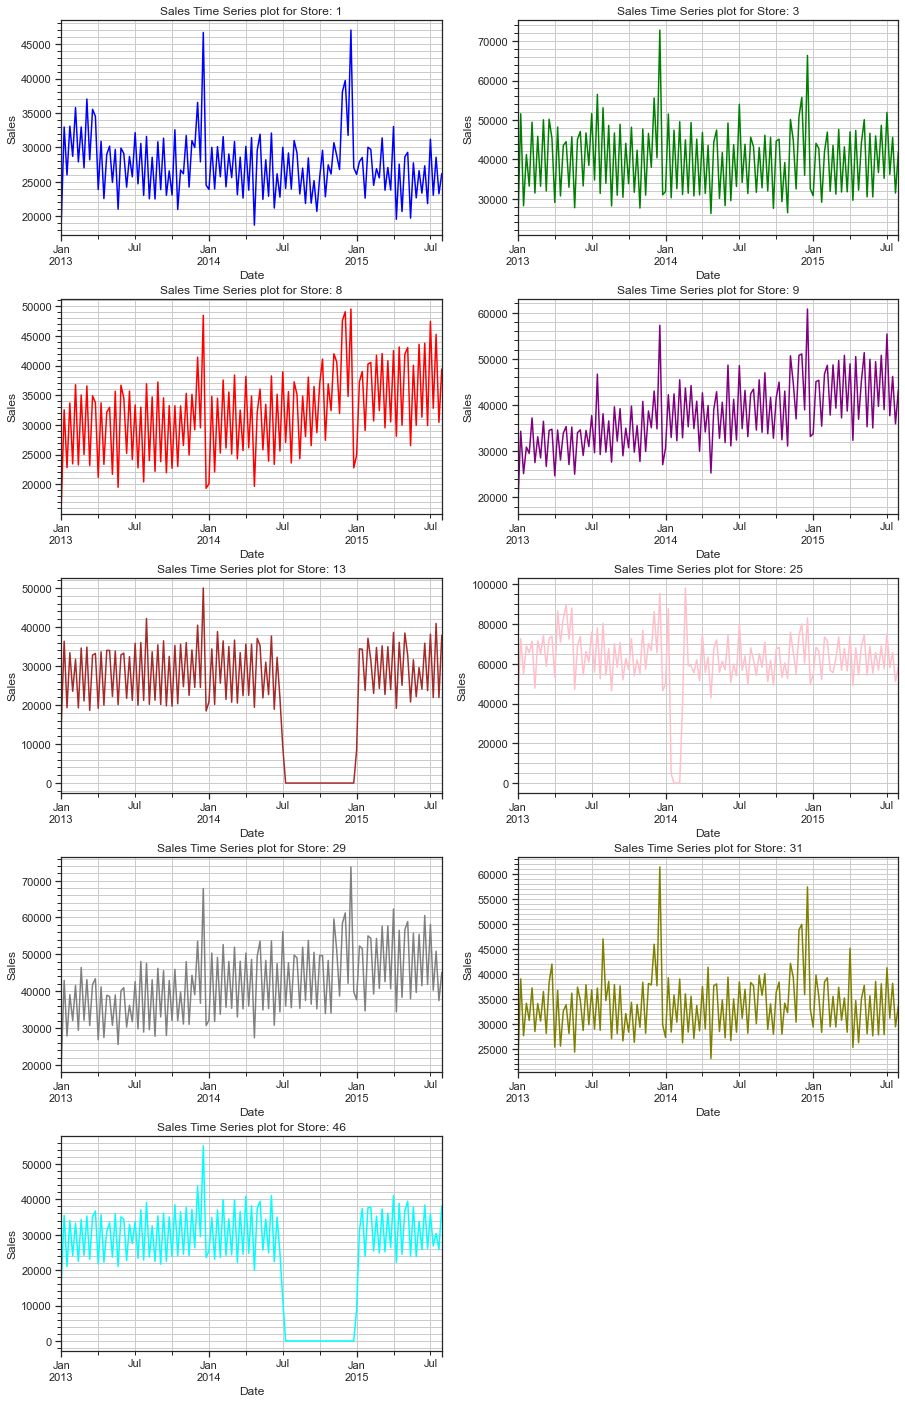

In [45]:
# Plotting sales distribution sample stores
time_series_dist_plot(store_list, 'Sales')

### Inference:
The weekly times series for sales shown is stationary for all stores. Retail sales for `Store Number` 1,3,8 and 9 tend to peak during the Christmas season (last quarter of 2015 & 2015) and then show a decline after the holiday seasons. We might see the same trend for `Store Number` 13 and 46 at the bottom, but there is no information from July 2014 to January 2015 about these stores, possibly because they were closed. There is a pattern of sales over time for each of the stores which is evident from this time series plot. For example, in some of the stores we can observe a peak in December month (probably Christmas time).

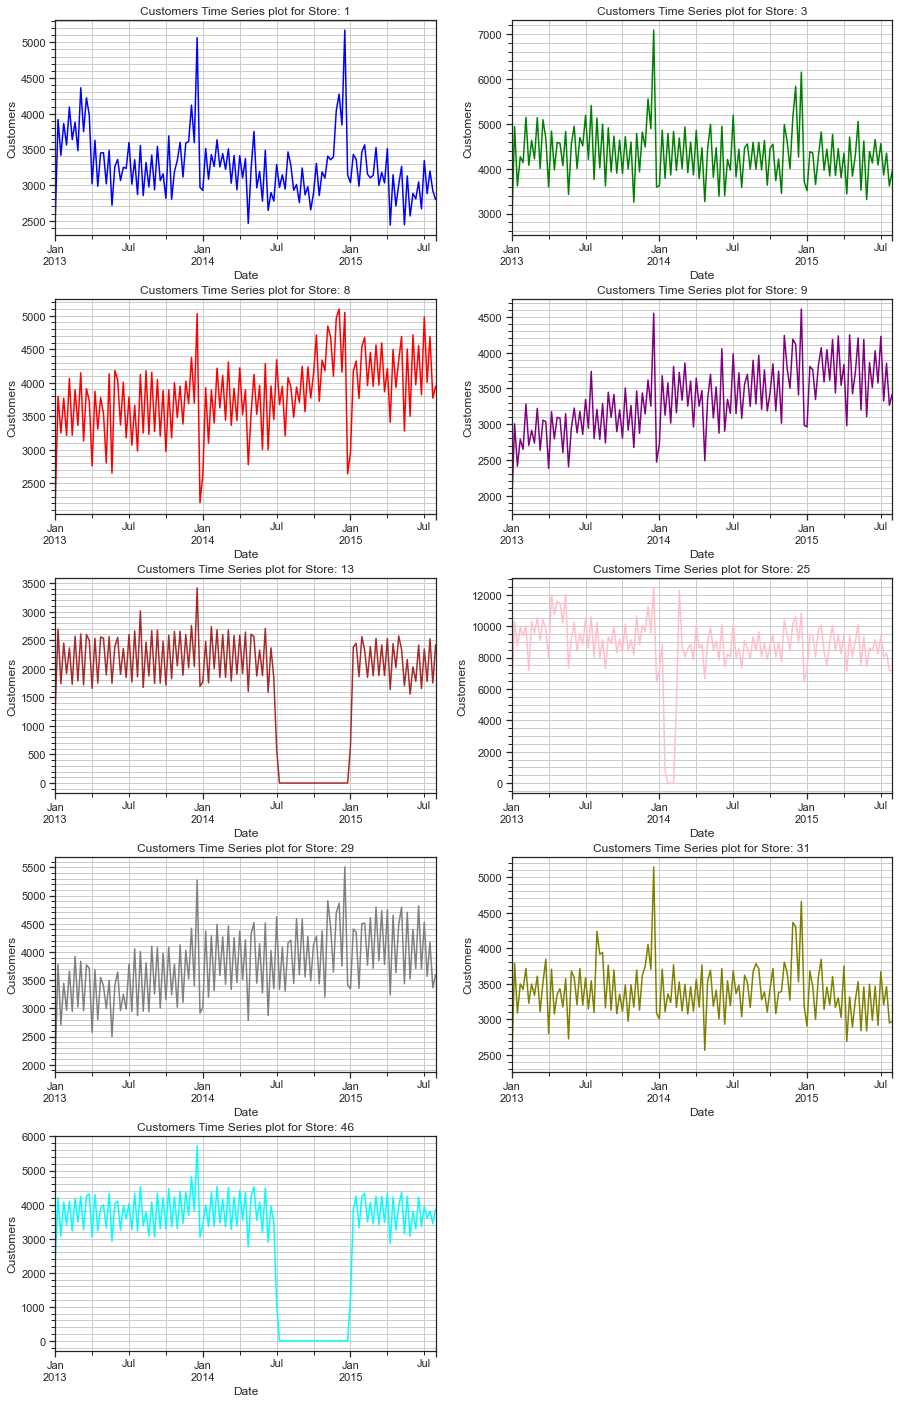

In [46]:
# Plotting for Customers distribution for all stores
time_series_dist_plot(store_list, 'Customers')

### Inference
The weekly times series for Customers shown is stationary for all stores. The Customers tend to show an endogenous relationship with sales as the series has seen a dip during the last quarter for 2014 and 2015. There is also a pattern of sales over time for each of the stores which is evident from this time series plot. For example, in some of the stores, we can observe a peak in December month (probably Christmas time). Customer and Sales data collected show a strong correlation.

### 4.3 Autocorrelation of Sales data

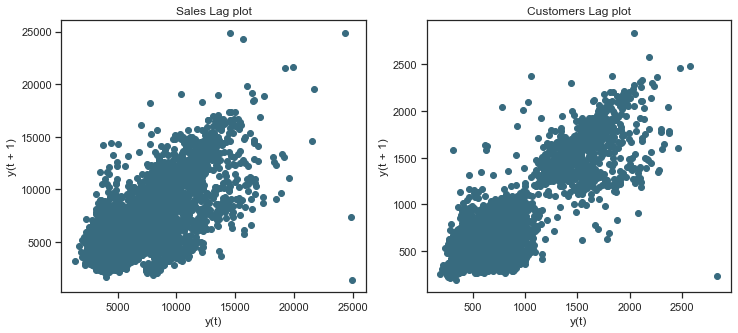

In [47]:
#Lag plot for Quick Check for Autocorrelation
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
lag_plot(df_train_store['Sales'], ax=ax1, c=c)
ax1.set_title('Sales Lag plot')
lag_plot(df_train_store['Customers'], ax=ax2, c=c)
ax2.set_title('Customers Lag plot')
plt.show()

### Inference
The lagplot for Sales and Customers datapoint show an ovalish pattern and are clumped in a linear fashion. Therefore, we can assume the data exhibits a strong non-random pattern.

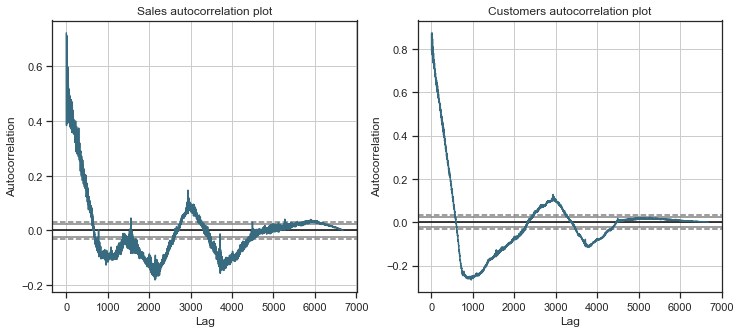

In [48]:
#autocorrelation plot for Quick Check for Autocorrelation
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
autocorrelation_plot(df_train_store['Sales'], ax=ax1, c=c)
ax1.set_title('Sales autocorrelation plot')
autocorrelation_plot(df_train_store['Customers'], ax=ax2, c=c)
ax2.set_title('Customers autocorrelation plot')
plt.show()

### Inference
As per above autocorrelation plot shows the time series for Sales have some randomness in the dataset. Similarly, customers autocorrelation plot also exemplify randomness as it has crossed the 0 boundary. The said has a high degree of autocorrelation between adjacent and near-adjacent observations.

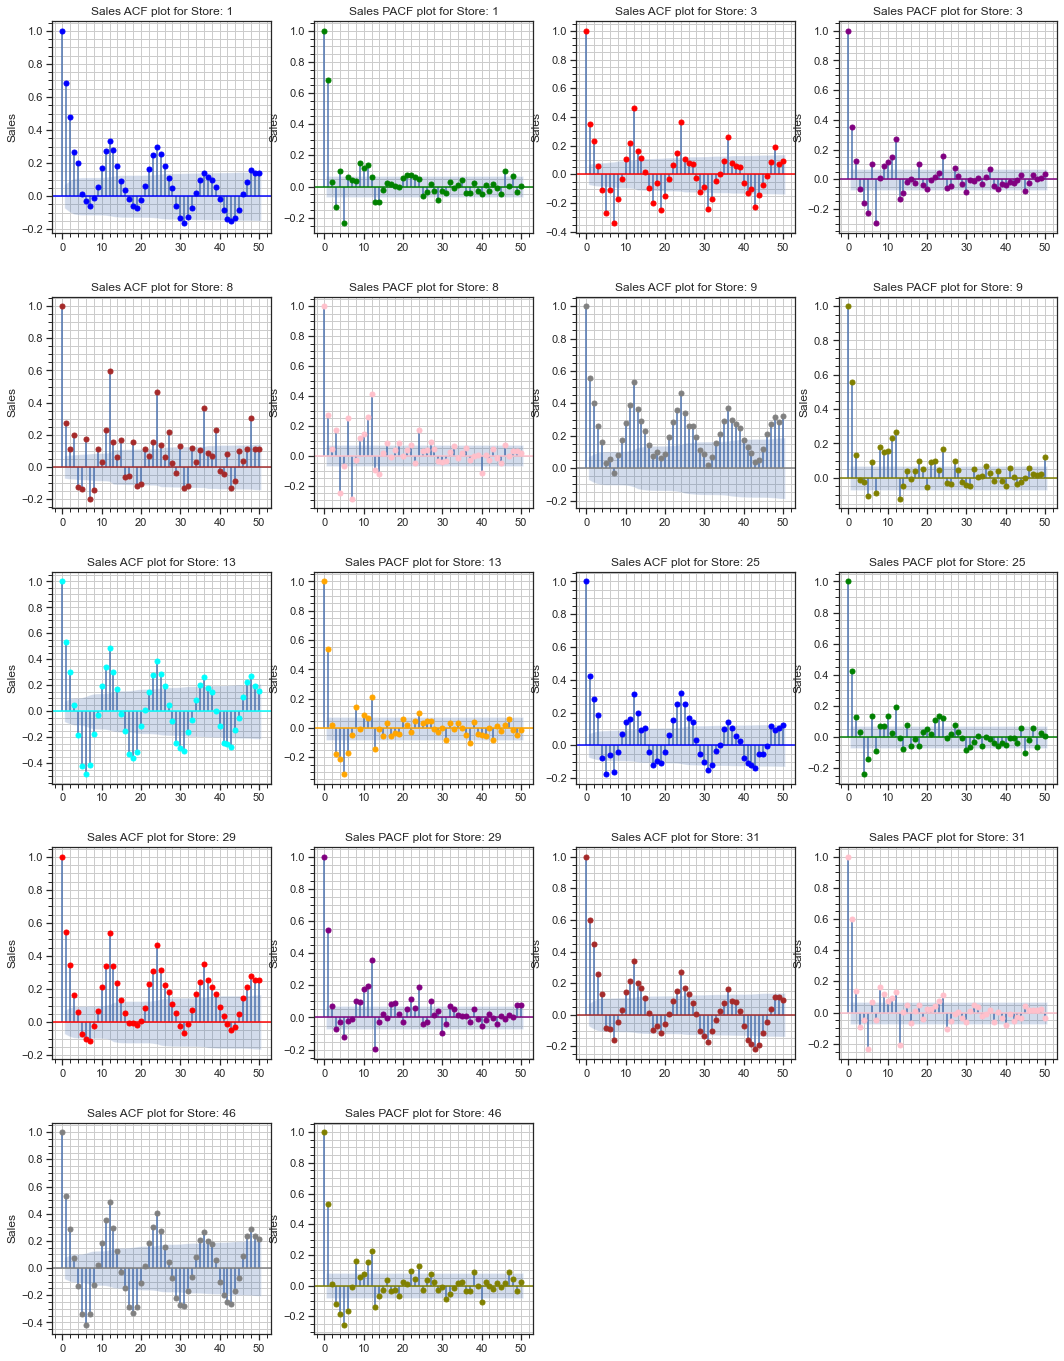

In [49]:
# Plotting Sales ACF & PACF for sample stores.
snum = [1, 1, 3, 3, 8, 8, 9, 9, 13, 13, 25, 25, 29, 29, 31, 31, 46, 46]
auto_partial_corr_plt(snum, 'Sales')

### Inference
Autocorrelation at a certain lag defines how much the series at that lag is correlated with the original series. Any correlation within the blue region is negligible and can be ignored. Here we have considered up to 50 days of lagged sales. For the stores above, the sales have a significant correlation with lagged sales up to around 10 days, with high values at 1-5 days lag, 6-10 days also lag but not to the same high degree.

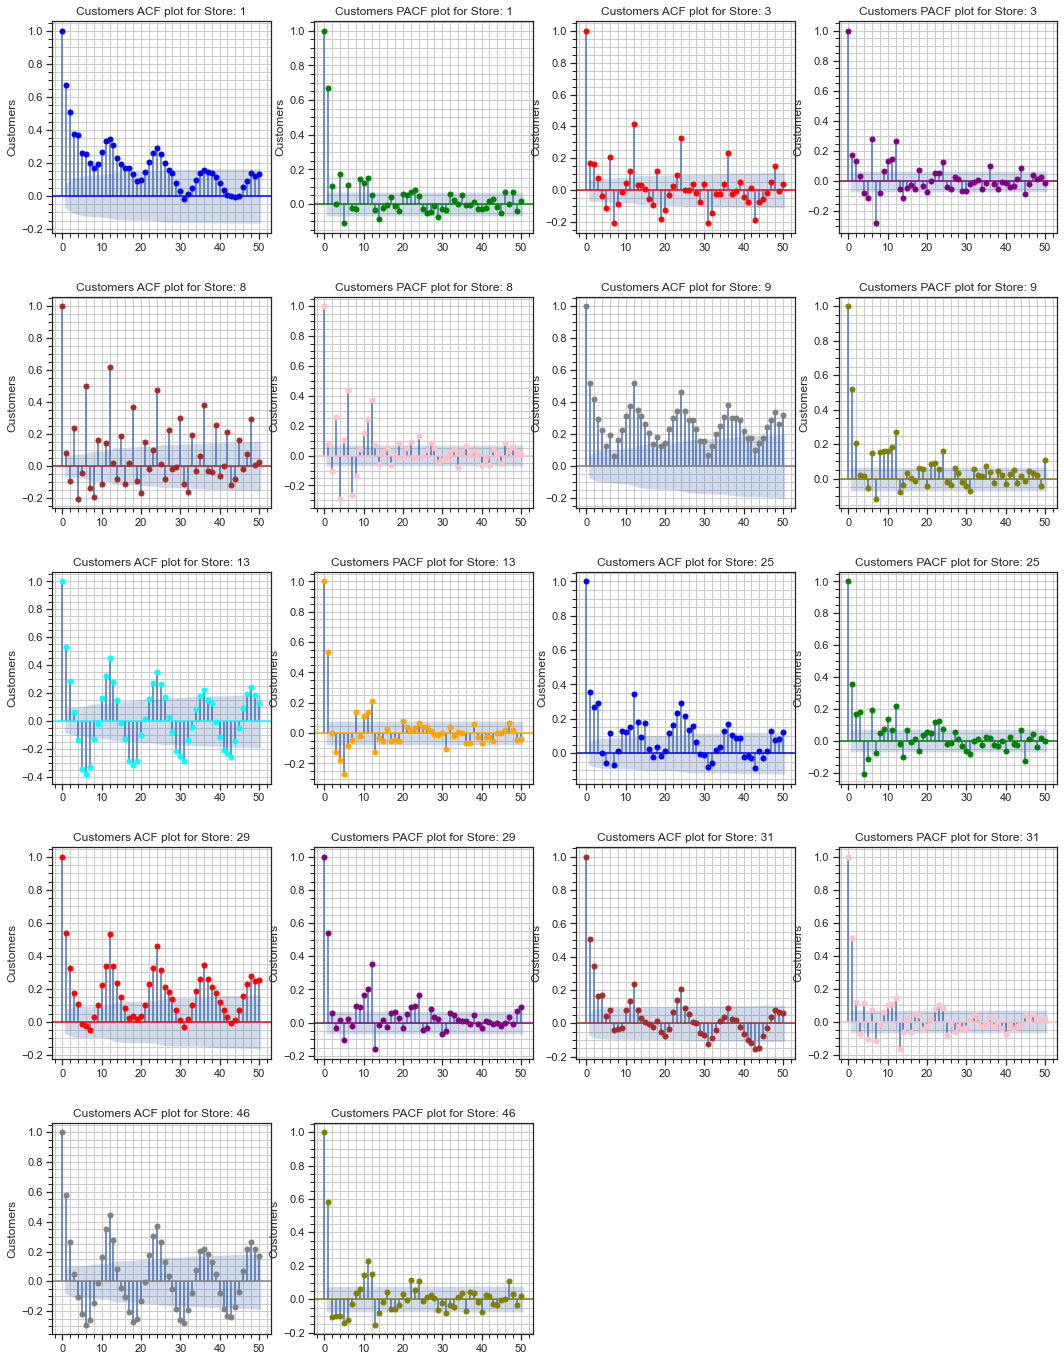

In [50]:
# Plotting customers ACF & PACF for sample stores.
auto_partial_corr_plt(snum, 'Customers')

### Inference
Autocorelation at a certain lag defines how much the series at that lag is correlated with the original series. Any correltion within the blue region is negligible and can be ignored. Here we have considered upto 50 days lagged sales. For the stores above, the sales have significant correlation with lagged sales upto around 10 days, with high values at 1-5 days lag, 6-10 days also lag but not to the same high degree.

### 4.4 Scatter data of Sales vs Customers

Text(0, 0.5, 'Customers')

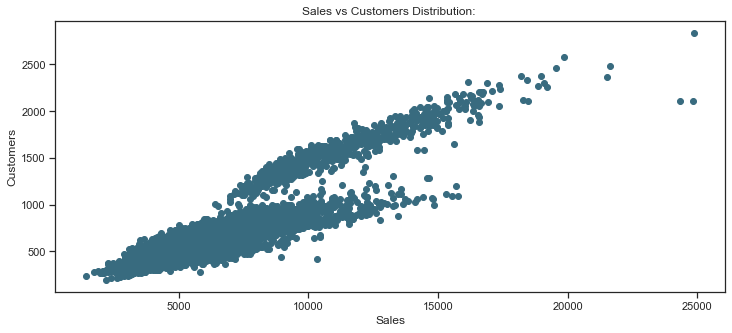

In [51]:
# Plotting for Sales vs Customers distribution plot
plt.rcParams["figure.figsize"] = [12,5]
plt.scatter(df_train_store['Sales'],df_train_store['Customers'], color=c)
plt.title('Sales vs Customers Distribution: ')
plt.xlabel('Sales')
plt.ylabel('Customers')

### Inference
The scatter plot shows the linearity between the sales and customers data. hence, we can inference the linear relation between sales and customers time series.

### Plot for Monthly Average & Percentage Sales

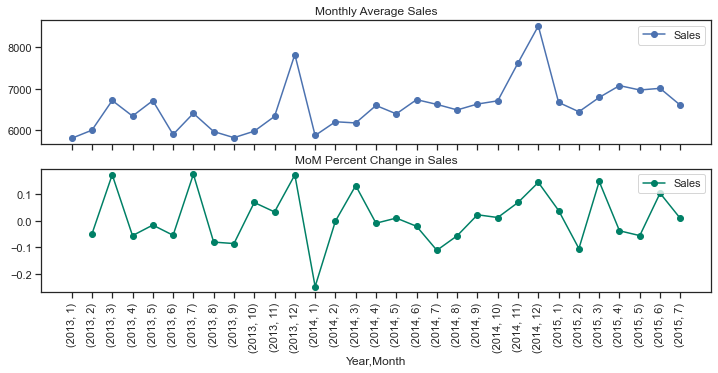

In [52]:
# group by date and get average sales, and precent change
average_sales    = df_train_store.groupby(['Year', 'Month'])["Sales"].mean()
pct_change_sales = df_train_store.groupby(['Year', 'Month'])["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(12,5))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Monthly Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot percent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend='True',ax=axis2,marker='o',rot=90,colormap="summer",title="MoM Percent Change in Sales")

### Inference
There is evident of peaks followed by troughs in monthly average sales. For every steep rise in sales there is an immediate fall following. A sharp rise in sales can be seen during end of the year (winter season) and smaller spikes can be observed during the summer months (June-September).

### 4.5 Seasonality

Sales: -2.024183849098735


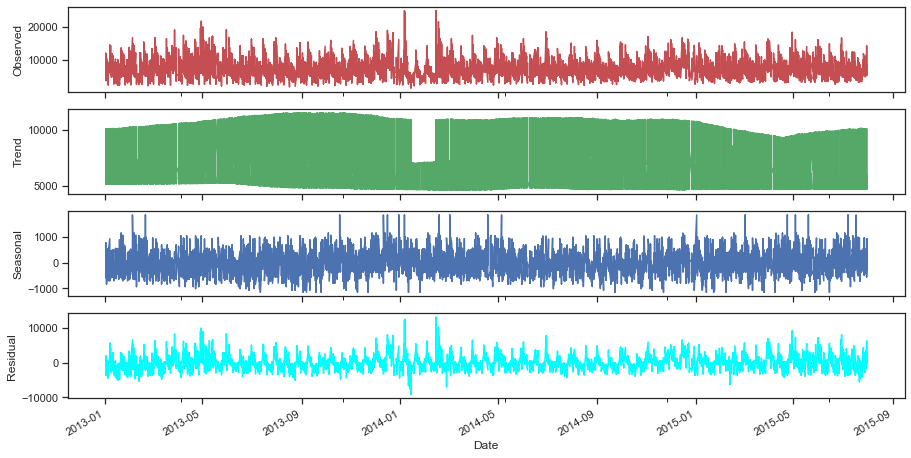

In [53]:
# Seasonality & Trend for All stores.
res = seasonal_decompose(df_train_store['Sales'], 
                         model='additive', freq=365, extrapolate_trend='freq')
plot_seasonality(res)
print('Sales:', res.resid.mean())

### Inference
It becomes clear from the time series decompostion plot that there is a trend in sales as we progress over the years. For all the stores analysed above there is a sharp peak in sales during December. Seasonal trends can also be clearly observed. Low sales can also be obsereved in the first 3 months of 2014.

Customers: -0.7473337157666222


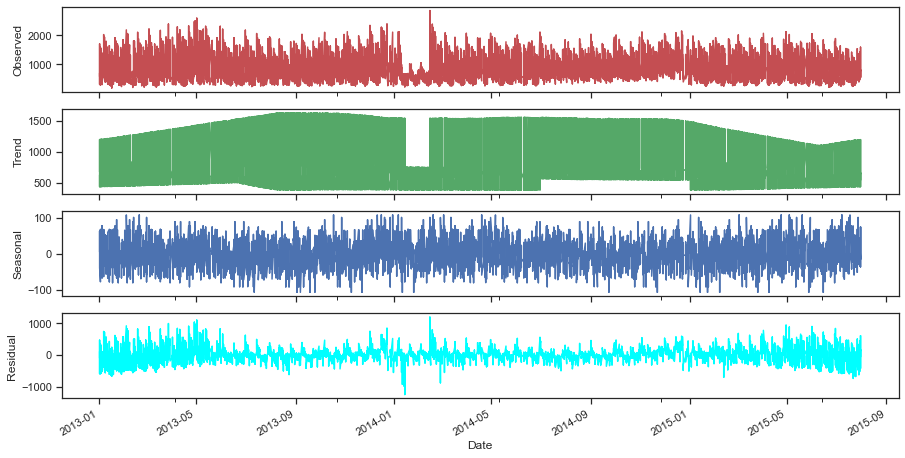

In [54]:
# Seasonality & Trend for All stores.
res = seasonal_decompose(df_train_store['Customers'], 
                         model='additive', freq=365, extrapolate_trend='freq')
plot_seasonality(res)
print('Customers:', res.resid.mean())

### Inference
The time series plot above is shown on daily basis, It becomes clear from the time series decomposition plot that there is a trend in sales as we progress over the years. For all the stores analyzed above, there is a sharp peak in sales during December. Seasonal trends can also be observed. A similar trend for the customer is also observed as seen for Sales.

### Sales distribution for all stores.

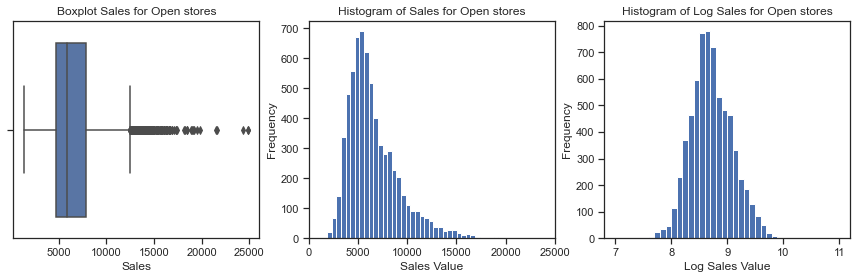

In [55]:
# Sales distribution for all stores.
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(15,4))
mask = df_train_store['Sales']>0
sns.boxplot(df_train_store[mask]["Sales"], orient='v', ax = axis1)
axis1.set_title("Boxplot Sales for Open stores")

df_train_store[mask]["Sales"].plot(kind='hist',bins=50,xlim=(0,25000), ax = axis2)
axis2.set_title("Histogram of Sales for Open stores")
axis2.set_xlabel('Sales Value')

axis3.hist(x = np.log(df_train_store[mask]["Sales"]), range=(7,11), bins=40)
axis3.set_title("Histogram of Log Sales for Open stores")
axis3.set_xlabel('Log Sales Value')
axis3.set_ylabel('Frequency')
plt.show()

### Inference
The data includes some outliers to the right, hence its skewed to the right side. After the transformation, the chart becomes more symmetric. 

### Customer distribution for all stores.

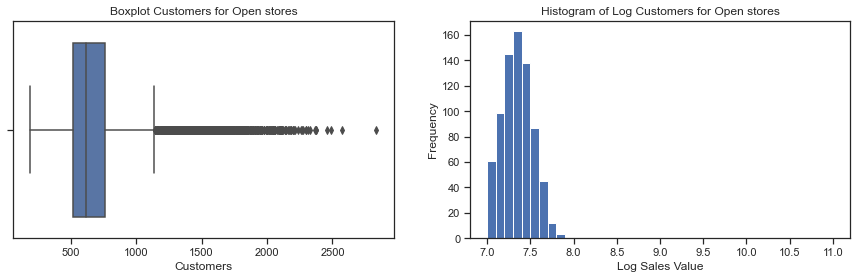

In [56]:
# Customer distribution for all stores.
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
mask = df_train_store['Sales']>0
sns.boxplot(df_train_store[mask]["Customers"], orient='v', ax = axis1)
axis1.set_title("Boxplot Customers for Open stores")

axis2.hist(x = np.log(df_train_store[mask]["Customers"]), range=(7,11), bins=40)
axis2.set_title("Histogram of Log Customers for Open stores")
axis2.set_xlabel('Log Sales Value')
axis2.set_ylabel('Frequency')
plt.show()

### Inference
The data includes some outliers to the right side.

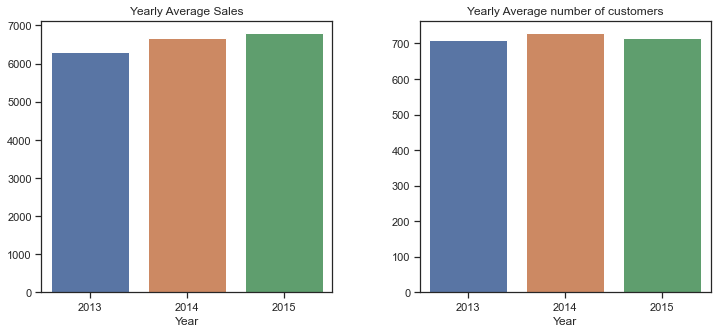

In [57]:
# Plot average sales & customers for every year
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
plt.subplots_adjust(wspace = 0.3)

df_y = df_train_store.groupby('Year')['Sales'].mean()
sns.barplot(x=df_y.index, y=df_y.values, ax=ax1)
ax1.set_xlabel('Year')
ax1.set_title('Yearly Average Sales')

df_y_c = df_train_store.groupby('Year')['Customers'].mean()
sns.barplot(x=df_y_c.index, y=df_y_c.values, ax=ax2)
ax2.set_xlabel('Year')
ax2.set_title('Yearly Average number of customers')
plt.show()

### Inference
In yearly average sales, 2015 seems to have the highest amount.
In average number of customers graph, 2014 seems to have the highest numbers.


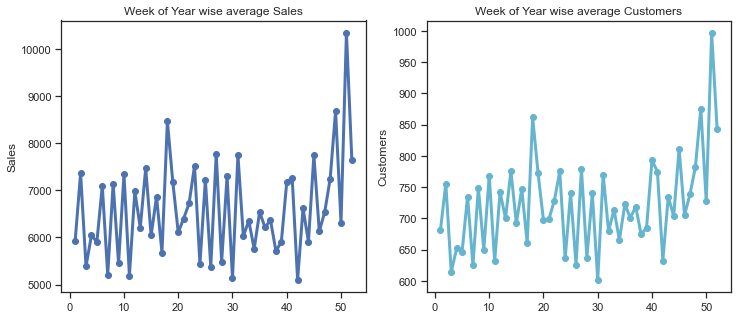

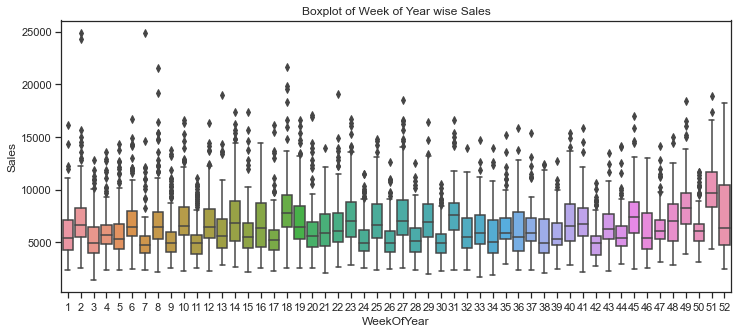

In [58]:
# Week of the year
# In both cases where the store is closed and opened
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
mask = mask = df_train_store["Sales"] > 0
dw_m = df_train_store[mask].groupby('WeekOfYear')['Sales'].mean()
dw_mc = df_train_store[mask].groupby('WeekOfYear')['Customers'].mean()

ax1.plot(dw_m.index.tolist(), dw_m.values, '-', marker = 'o', linewidth = 3)
ax1.set_title('Week of Year wise average Sales')
ax1.set_ylabel('Sales')

ax2.plot(dw_mc.index.tolist(), dw_mc.values, '-', marker = 'o', linewidth = 3, color = 'c')
ax2.set_title('Week of Year wise average Customers')
ax2.set_ylabel('Customers')

fig, ax3 = plt.subplots(1,1,figsize=(12,5))
dw_m_c = df_train_store[(df_train_store.Sales>0)&(df_train_store.Year!=2015)]
sns.boxplot(data = df_train_store[mask], x='WeekOfYear', y='Sales', ax=ax3)
ax3.set_title('Boxplot of Week of Year wise Sales')
ax3.set_ylabel('Sales')
plt.show()

### Inference
The week wise sales reveals highest sales during last 3-4 weeks. In some of the weeks in range 18-31 the sales are higher than most other weeks. The same story is true for the number of customers visiting the stores.

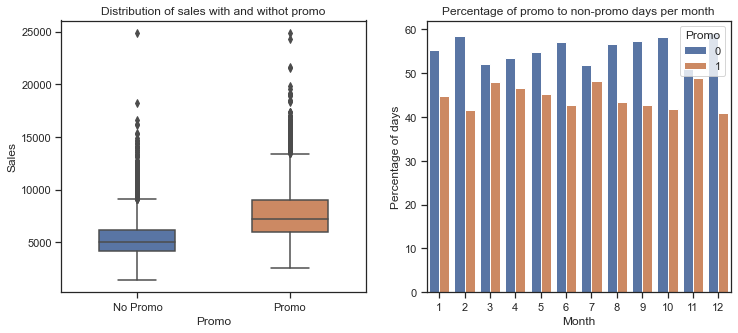

In [59]:
# Plot average sales & customers with/without promo
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,5))
sns.boxplot(x='Promo', y='Sales', data=df_train_store, ax=axis1, width=0.5)
axis1.set_xticks([0,1])
axis1.set_xticklabels(['No Promo', 'Promo'])
axis1.set_title('Distribution of sales with and withot promo')

promo_month = (df_train_store.groupby(['Month'])['Promo']
                     .value_counts(normalize=True)
                     .rename('Percentage of days')
                     .mul(100)
                     .reset_index()
                     .sort_values('Month'))
sns.barplot(x="Month", y="Percentage of days", hue="Promo", data=promo_month, ax = axis2)
axis2.set_title('Percentage of promo to non-promo days per month')
plt.show()

### Inference
Sales are higher when there is promotions are given in a store. If we take a look at how the promotions are distributed over the months, we find that in any month (on an average) around 30-40% of the days (i.e. 10-12 days per month) the stores run promotional offers. However, it is higher for March, July, and November and significantly lower in December. This could be a strategy to even out sales over the months. The stores might increase promotion duration when the sales go down or clear inventory before the new sales cycle begins.

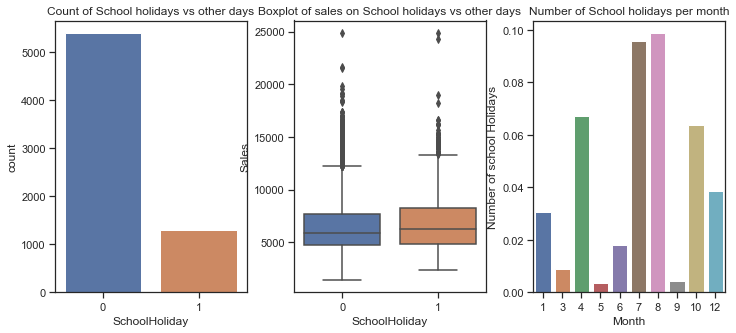

In [60]:
# SchoolHoliday
fig, (axis1,axis2, axis3) = plt.subplots(1,3,figsize=(12,5))
plt.subplots_adjust(wspace = 0.25)
sns.countplot(x='SchoolHoliday', data=df_train_store, ax = axis1)
axis1.set_title('Count of School holidays vs other days')
mask = mask = df_train_store["Sales"] > 0
sch_df = df_train_store[mask]

sns.boxplot(data = sch_df, x = 'SchoolHoliday', y = 'Sales', ax=axis2)
axis2.set_title('Boxplot of sales on School holidays vs other days')

sch_df_1 = (df_train_store[(df_train_store['SchoolHoliday']==1)&(df_train_store['Year']==2014)].groupby('Month')['SchoolHoliday']
                     .value_counts()
                     .div(1115)
                     .rename('Number of school Holidays')
                     .reset_index()
                     .sort_values('Month'))
sns.barplot(x="Month", y="Number of school Holidays", data=sch_df_1, ax = axis3)
axis3.set_title('Number of School holidays per month')
plt.show()

- Sales on school holidays are very similar to other days. The median value on school holidays is slightly higher.
- The last plot shows how the school holidays are distributed over the months for a particular year. The Months of July and August are summer holidays for school. There is also a winter break which is reflected by the number of holidays in December. Apart from that, there are some holidays in March and October. This is important because our test data lies in August and September.

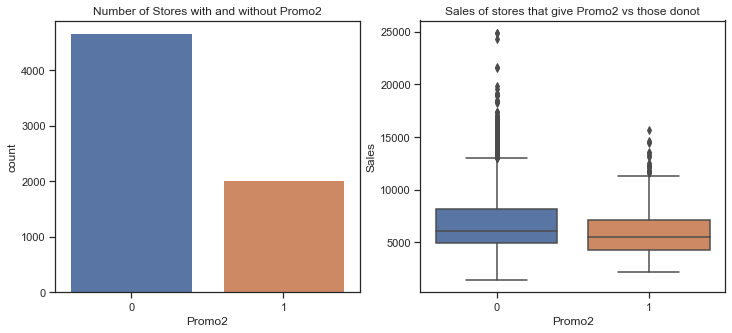

In [61]:
# Promo2
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,5))

sns.countplot(x='Promo2', data=df_train_store, ax = axis1)
axis1.set_title('Number of Stores with and without Promo2')

sns.boxplot(data=df_train_store[mask], x='Promo2', y='Sales', ax=axis2)
axis2.set_title('Sales of stores that give Promo2 vs those donot')
plt.show()

### Inference
- No. of stores participating in secondary promotions(promo 2) is slightly higher than the ones not participating.
- Stores that do not participate in promo2 have higher sales than the ones that have promo2. So they might be trying to attract more customers by giving additional promotions to increase sales.

### 5.2.1 Correlational Analysis

We are finished with adding new variables to the data, so now we can check the overall correlations by plotting the `seaborn` heatmap:

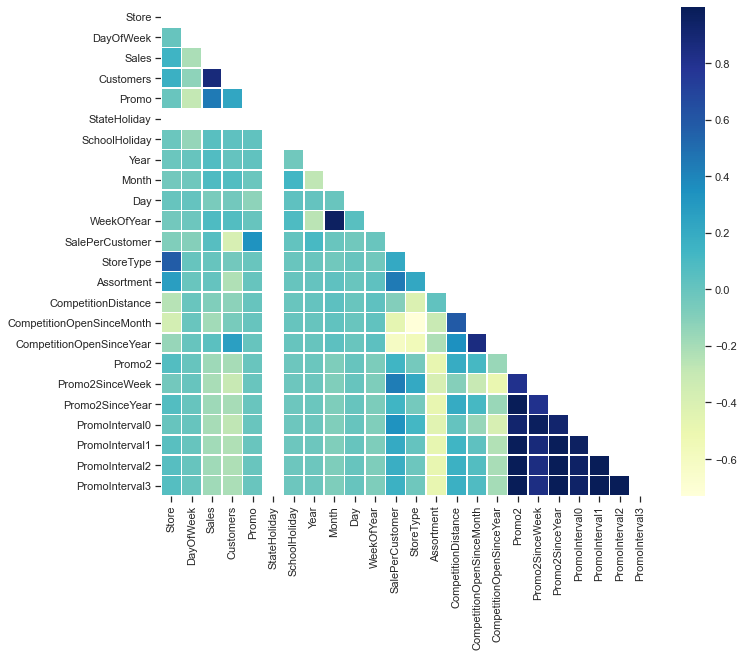

In [62]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = df_train_store.drop('Open', axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "YlGnBu")      
plt.show()

### Inference
As mentioned before, we have a strong positive correlation between the number of Sales and Customers of a store. We can also observe a positive correlation between the fact that the store had a running promotion (`Promo` equal to 1) and amount of `Customers`. 

However, as soon as the store continues a consecutive promotion (`Promo2` equal to 1) the number of `Customers` and `Sales` seems to stay the same or even decrease, which is described by the pale negative correlation on the heatmap. The same negative correlation is observed between the presence of the promotion in the store and the day of a week.

## Final Inferences from EDA 

1. Median sale is 6369 for only stores open on that day. There are also a few outliers in the data. 99% sales lie within 17789 and 99.9% sales are less than 24669 But there are data points above 40k. 

2. For the dependent variable, the sales are not normally distributed. Upon log transformation, we see that sales are much closely distributed than expected.

3.  There is evidence of peaks following the troughs in monthly average sales. For every steep rise in the data, there is also an immediate fall. Seasonal trends are found as well.

4. Autocorrelation is also found within the original series. For the stores above, the sales include a strong correlation with lagged ups in sales to around 45 days (with high values at 10-14 days lag, 25-30 days lag, and also around 35 and 45 days lagged sales).

5. Average sales see an increase as the data progresses over the years while the average number of customers visiting has only increased from 2013 to 2014. 2015, however, seems to be unpredictable.

6. A lot of the stores are closed on Sundays. But if we consider both opened and closed stores, the average Sunday sales are lowest.

7. However, on the contrary, if take Open stores only, Sunday and Monday (day 1) sales are among the highest. The number of customers visiting on Sundays greater than any other day on an average.

8. In the test data there are no stores from the following 4 states BE, SN, ST, and TH. But in other sets the number of stores in test and train data are equivalent. Most of the stores are in state NW. All states have comparable sales with "BE" having slightly higher median sales than the other states.

9. Sales, in general, have higher sales when there is promotions are given in a store. In any month (on an average) around 30-40% of the days (i.e. 10-12 days per month) the stores run promotional offers. However, it is higher for March, July, and November and significantly lower in December. This could be a strategy to even out sales over the months. The stores might increase promotion duration when the sales go down or clear inventory before the new sales cycle begins.

10. The number of state holidays of the type 'a' are more frequent, while type 'c' is the least frequent. 

11.  On all types of state holidays, the average sales are found to be higher than any other day. But if we take into account both open and closed stores we find that average sales are lower on a state holiday which is not true because some of the stores remain closed on state holidays.

12. Sales on school holidays are quite similar to the other days. The median value on school holidays is slightly higher.

13. It's important to remember that July and August are summer holidays for school. Because our test data lies in August and September. There is also a winter break which is reflected by the number of holidays in December. Apart from that, there are some school holidays in March and October. 


14. Stores selling assortment type 'a' are more frequently occurring while stores selling assortment type 'b' are much less common. Median sales in-store selling assortment 'b' are slightly higher than other stores.

15. Number of stores that participate in secondary promotions (promo 2) is slightly higher than the ones not participating.

# 5. Outlier Treatment

### 5.1.1 Outlier detection

#### 5.1.1 Box plot and interquartile range for Sales and Customers data

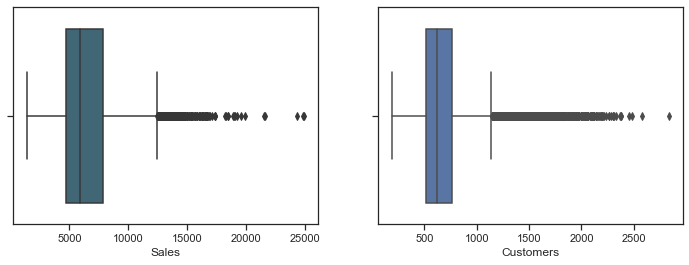

In [63]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

sns.boxplot(x=df_train_store['Sales'],whis=1.5, ax=ax1, color=c)
sns.boxplot(x=df_train_store['Customers'],whis=1.5, ax=ax2)
plt.show()

### Inference
- Median sale is 6000 for only stores open on that day. There are also a few outliers in the data. 99% sales lies within 15500 and 99.9% sales are less than 24882 But there are data points above 6k.
- Median Customers is 650 for only stores open on that day. There are also a few outliers in the data. 99% sales lies within 1976.

#### 5.1.2 Histogram plot

Text(0.5, 1.0, 'Customers Histogram plot')

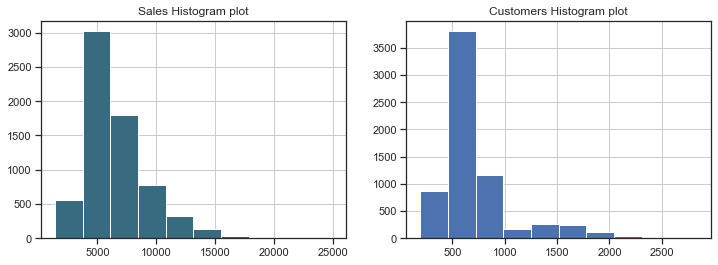

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

ax1=df_train_store.Sales.hist(ax=ax1, color=c)
ax1.set_title('Sales Histogram plot')
ax2=df_train_store.Customers.hist(ax=ax2)
ax2.set_title('Customers Histogram plot')

### Inference
For the dependent variable, the sales are not normally distributed. Upon log transformation, we see that sales are much closely distrubuted than expected. Both sales and customers show a similar trend above. For example, there are some outliers present in the plot (beyond 15k for sales, and beyond 2k for customers)

In [65]:
df_train_store.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Store    DayOfWeek         Sales    Customers    Open  \
count  6679.000000  6679.000000   6679.000000  6679.000000  6679.0   
mean     17.776763     3.506064   6549.722414   716.810600     1.0   
std      13.999680     1.712728   2632.977121   353.300394     0.0   
min       1.000000     1.000000   1410.000000   194.000000     1.0   
25%       8.000000     2.000000   4740.500000   517.000000     1.0   
50%      13.000000     3.000000   5921.000000   619.000000     1.0   
75%      29.000000     5.000000   7829.500000   765.500000     1.0   
90%      31.000000     6.000000  10051.200000  1251.200000     1.0   
95%      46.000000     6.000000  11818.300000  1600.000000     1.0   
99%      46.000000     6.000000  15226.680000  1976.880000     1.0   
max      46.000000     6.000000  24882.000000  2835.000000     1.0   

             Promo  StateHoliday  SchoolHoliday         Year        Month  \
count  6679.000000        6679.0    6679.000000  6679.000000  6679.000000   
mean      0.447971           0.0       0.193292  2013.828567     5.814194   
std       0.497323           0.0       0.394910     0.783239     3.311574   
min       0.000000           0.0       0.000000  2013.000000     1.000000   
25%       0.000000           0.0       0.000000  2013.000000     3.000000   
50%       0.000000           0.0       0.000000  2014.000000     6.000000   
75%       1.000000           0.0       0.000000  2014.000000     8.000000   
90%       1.000000           0.0       1.000000  2015.000000    11.000000   
95%       1.000000           0.0       1.000000  2015.000000    12.000000   
99%       1.000000           0.0       1.000000  2015.000000    12.000000   
max       1.000000           0.0       1.000000  2015.000000    12.000000   

               Day   WeekOfYear  SalePerCustomer    StoreType   Assortment  \
count  6679.000000  6679.000000      6679.000000  6679.000000  6679.000000   
mean     15.849079    23.518940         9.520721     1.625692     0.701303   
std       8.677648    14.337613         2.003043     1.260846     0.954419   
min       1.000000     1.000000         5.706169     0.000000     0.000000   
25%       8.000000    11.000000         7.912390     0.000000     0.000000   
50%      16.000000    22.000000         9.305882     2.000000     0.000000   
75%      23.000000    34.500000        10.873640     3.000000     2.000000   
90%      28.000000    45.000000        12.172089     3.000000     2.000000   
95%      30.000000    49.000000        13.024663     3.000000     2.000000   
99%      31.000000    51.000000        14.882102     3.000000     2.000000   
max      31.000000    52.000000        24.901205     3.000000     2.000000   

       CompetitionDistance  CompetitionOpenSinceMonth  \
count          6679.000000                6679.000000   
mean           4508.344063                   6.667914   
std            4717.918027                   4.012847   
min             310.000000                   0.000000   
25%            1200.000000                   4.000000   
50%            2030.000000                   8.000000   
75%            7520.000000                   9.000000   
90%           14130.000000                  12.000000   
95%           14130.000000                  12.000000   
99%           14130.000000                  12.000000   
max           14130.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  \
count               6679.000000  6679.000000      6679.000000   
mean                1586.265309     0.302740         7.120677   
std                  816.962261     0.459478        13.368489   
min                    0.000000     0.000000         0.000000   
25%                 2000.000000     0.000000         0.000000   
50%                 2005.000000     0.000000         0.000000   
75%                 2008.000000     1.000000        14.000000   
90%                 2014.000000     1.000000        14.000000   
95%                 2014.000000     1.00

### Inference 

The `Sales`,`Customers` and `SalePerCustomer` variables has outliers, henece We'll need to cap the outliers at the 99th percentile for these variables

#### Capping Ranges:
- 1st - 99th percentile -  Soft range.
- 5th - 95th percentile -> Medium range.
- 25th- 75th percentile -> Hard range.

In [66]:
#Capping the variables at 99th percentile
cols = ['Sales','Customers', 'SalePerCustomer']

# iterate through the columns and cap the values with the 99th percentile
for col in cols:
    percentiles = df_train_store[col].quantile([0.01,0.99]).values
    df_train_store[col][df_train_store[col] >= percentiles[1]] = percentiles[1]

In [67]:
df_train_store.describe(percentiles=[.25, .5, .75, .90, .95, .99])

Store    DayOfWeek         Sales    Customers    Open  \
count  6679.000000  6679.000000   6679.000000  6679.000000  6679.0   
mean     17.776763     3.506064   6531.255062   715.059733     1.0   
std      13.999680     1.712728   2555.431308   346.208445     0.0   
min       1.000000     1.000000   1410.000000   194.000000     1.0   
25%       8.000000     2.000000   4740.500000   517.000000     1.0   
50%      13.000000     3.000000   5921.000000   619.000000     1.0   
75%      29.000000     5.000000   7829.500000   765.500000     1.0   
90%      31.000000     6.000000  10051.200000  1251.200000     1.0   
95%      46.000000     6.000000  11818.300000  1600.000000     1.0   
99%      46.000000     6.000000  15210.549600  1976.193600     1.0   
max      46.000000     6.000000  15226.680000  1976.880000     1.0   

             Promo  StateHoliday  SchoolHoliday         Year        Month  \
count  6679.000000        6679.0    6679.000000  6679.000000  6679.000000   
mean      0.447971           0.0       0.193292  2013.828567     5.814194   
std       0.497323           0.0       0.394910     0.783239     3.311574   
min       0.000000           0.0       0.000000  2013.000000     1.000000   
25%       0.000000           0.0       0.000000  2013.000000     3.000000   
50%       0.000000           0.0       0.000000  2014.000000     6.000000   
75%       1.000000           0.0       0.000000  2014.000000     8.000000   
90%       1.000000           0.0       1.000000  2015.000000    11.000000   
95%       1.000000           0.0       1.000000  2015.000000    12.000000   
99%       1.000000           0.0       1.000000  2015.000000    12.000000   
max       1.000000           0.0       1.000000  2015.000000    12.000000   

               Day   WeekOfYear  SalePerCustomer    StoreType   Assortment  \
count  6679.000000  6679.000000      6679.000000  6679.000000  6679.000000   
mean     15.849079    23.518940         9.509942     1.625692     0.701303   
std       8.677648    14.337613         1.964717     1.260846     0.954419   
min       1.000000     1.000000         5.706169     0.000000     0.000000   
25%       8.000000    11.000000         7.912390     0.000000     0.000000   
50%      16.000000    22.000000         9.305882     2.000000     0.000000   
75%      23.000000    34.500000        10.873640     3.000000     2.000000   
90%      28.000000    45.000000        12.172089     3.000000     2.000000   
95%      30.000000    49.000000        13.024663     3.000000     2.000000   
99%      31.000000    51.000000        14.880682     3.000000     2.000000   
max      31.000000    52.000000        14.882102     3.000000     2.000000   

       CompetitionDistance  CompetitionOpenSinceMonth  \
count          6679.000000                6679.000000   
mean           4508.344063                   6.667914   
std            4717.918027                   4.012847   
min             310.000000                   0.000000   
25%            1200.000000                   4.000000   
50%            2030.000000                   8.000000   
75%            7520.000000                   9.000000   
90%           14130.000000                  12.000000   
95%           14130.000000                  12.000000   
99%           14130.000000                  12.000000   
max           14130.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  \
count               6679.000000  6679.000000      6679.000000   
mean                1586.265309     0.302740         7.120677   
std                  816.962261     0.459478        13.368489   
min                    0.000000     0.000000         0.000000   
25%                 2000.000000     0.000000         0.000000   
50%                 2005.000000     0.000000         0.000000   
75%                 2008.000000     1.000000        14.000000   
90%                 2014.000000     1.000000        14.000000   
95%                 2014.000000     1.00

# 6. Data Preparation

Following Steps for data preparation: 
- Has explored the data and removed unnecessary columns
 
- The student has checked if there is any skewness in the data and tried to mitigate it.
 
- Has performed stratified train-test split successfully to create train & test datasets.

### 6.1.1 Remove unnecessary variables.

In [68]:
vcol = ['Store', 'DayOfWeek', 'Open', 'Promo','StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 
        'WeekOfYear','StoreType', 'Assortment', 'CompetitionDistance','CompetitionOpenSinceMonth', 
        'CompetitionOpenSinceYear', 'Promo2','Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval0',
        'PromoInterval1', 'PromoInterval2', 'PromoInterval3']
for i in vcol:
    print(i, Counter(df_train_store[i]))

Store Counter({8: 784, 31: 784, 1: 781, 3: 779, 9: 779, 29: 779, 25: 750, 46: 622, 13: 621})
DayOfWeek Counter({2: 1146, 6: 1146, 3: 1129, 5: 1103, 1: 1091, 4: 1064})
Open Counter({1: 6679})
Promo Counter({0: 3687, 1: 2992})
StateHoliday Counter({0: 6679})
SchoolHoliday Counter({0: 5388, 1: 1291})
Year Counter({2013: 2719, 2014: 2386, 2015: 1574})
Month Counter({3: 692, 1: 683, 7: 675, 6: 661, 4: 657, 5: 641, 2: 635, 8: 422, 10: 416, 9: 407, 11: 399, 12: 391})
Day Counter({11: 238, 2: 233, 27: 232, 23: 232, 13: 232, 4: 232, 16: 231, 18: 230, 28: 225, 7: 225, 24: 223, 20: 223, 17: 223, 10: 223, 12: 223, 5: 223, 22: 221, 8: 220, 15: 219, 6: 219, 14: 217, 19: 217, 21: 216, 9: 215, 25: 214, 26: 208, 30: 207, 3: 197, 29: 185, 1: 148, 31: 128})
WeekOfYear Counter({26: 162, 12: 162, 11: 162, 9: 162, 10: 161, 8: 161, 3: 158, 2: 158, 7: 157, 6: 156, 5: 156, 4: 156, 25: 155, 23: 155, 24: 153, 21: 153, 20: 153, 19: 153, 17: 153, 16: 153, 15: 153, 13: 153, 27: 152, 30: 150, 29: 150, 28: 150, 14: 1

### Inference
Since the Open, StateHoliday has unique values, which don't impact the model predictions. Hence we remove these unnecessary columns.

In [69]:
# Remove StateHoliday variable.
df_train_store = df_train_store.drop(columns = ['Open','StateHoliday'])
df_train_store.head()

Store  DayOfWeek   Sales  Customers  Promo  SchoolHoliday  Year  \
Date                                                                          
2015-07-31      1          5  5263.0      555.0      1              1  2015   
2015-07-30      1          4  5020.0      546.0      1              1  2015   
2015-07-29      1          3  4782.0      523.0      1              1  2015   
2015-07-28      1          2  5011.0      560.0      1              1  2015   
2015-07-27      1          1  6102.0      612.0      1              1  2015   

            Month  Day  WeekOfYear  SalePerCustomer  StoreType  Assortment  \
Date                                                                         
2015-07-31      7   31          31         9.482883          2           0   
2015-07-30      7   30          31         9.194139          2           0   
2015-07-29      7   29          31         9.143403          2           0   
2015-07-28      7   28          31         8.948214          2           0   
2015-07-27      7   27          31         9.970588          2           0   

            CompetitionDistance  CompetitionOpenSinceMonth  \
Date                                                         
2015-07-31               1270.0                        9.0   
2015-07-30               1270.0                        9.0   
2015-07-29               1270.0                        9.0   
2015-07-28               1270.0                        9.0   
2015-07-27               1270.0                        9.0   

            CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Date                                                            
2015-07-31                    2008.0       0              0.0   
2015-07-30                    2008.0       0              0.0   
2015-07-29                    2008.0       0              0.0   
2015-07-28                    2008.0       0              0.0   
2015-07-27                    2008.0       0              0.0   

            Promo2SinceYear  PromoInterval0  PromoInterval1  PromoInterval2  \
Date                                                                          
2015-07-31              0.0             0.0             0.0             0.0   
2015-07-30              0.0             0.0             0.0             0.0   
2015-07-29              0.0             0.0             0.0             0.0   
2015-07-28              0.0             0.0             0.0             0.0   
2015-07-27              0.0             0.0             0.0             0.0   

            PromoInterval3  
Date                        
2015-07-31             0.0  
2015-07-30             0.0  
2015-07-29             0.0  
2015-07-28             0.0  
2015-07-27             0.0

### 6.1.2 Skewness check and Impute

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. Let's find out the high skewed variable and transform them.

In [70]:
## Skewness range -1 to 1
lst=[]
for i in df_train_store.columns:
    if -1 < df_train_store[i].skew() > 1:
        print("--- "+i+" ---")
        print("Skewness: %f" % df_train_store[i].skew())
        lst.append(i)

--- Sales ---
Skewness: 1.172160
--- Customers ---
Skewness: 1.904174
--- SchoolHoliday ---
Skewness: 1.553770
--- Promo2SinceWeek ---
Skewness: 2.039274
--- PromoInterval0 ---
Skewness: 1.396629


### Inference
The `Sales` and `Customers` seems to be high skewness and will perform the Normality/variance check during the model build steps and now we will be transform the rest of high skewed variable with power transformer.

In [71]:
lst.remove('Sales')
lst.remove('Customers')
lst

['SchoolHoliday', 'Promo2SinceWeek', 'PromoInterval0']

In [72]:
# power transform the raw data
pt = PowerTransformer(method='yeo-johnson', standardize=True)
df_train_store[lst] = pt.fit_transform(df_train_store[lst])

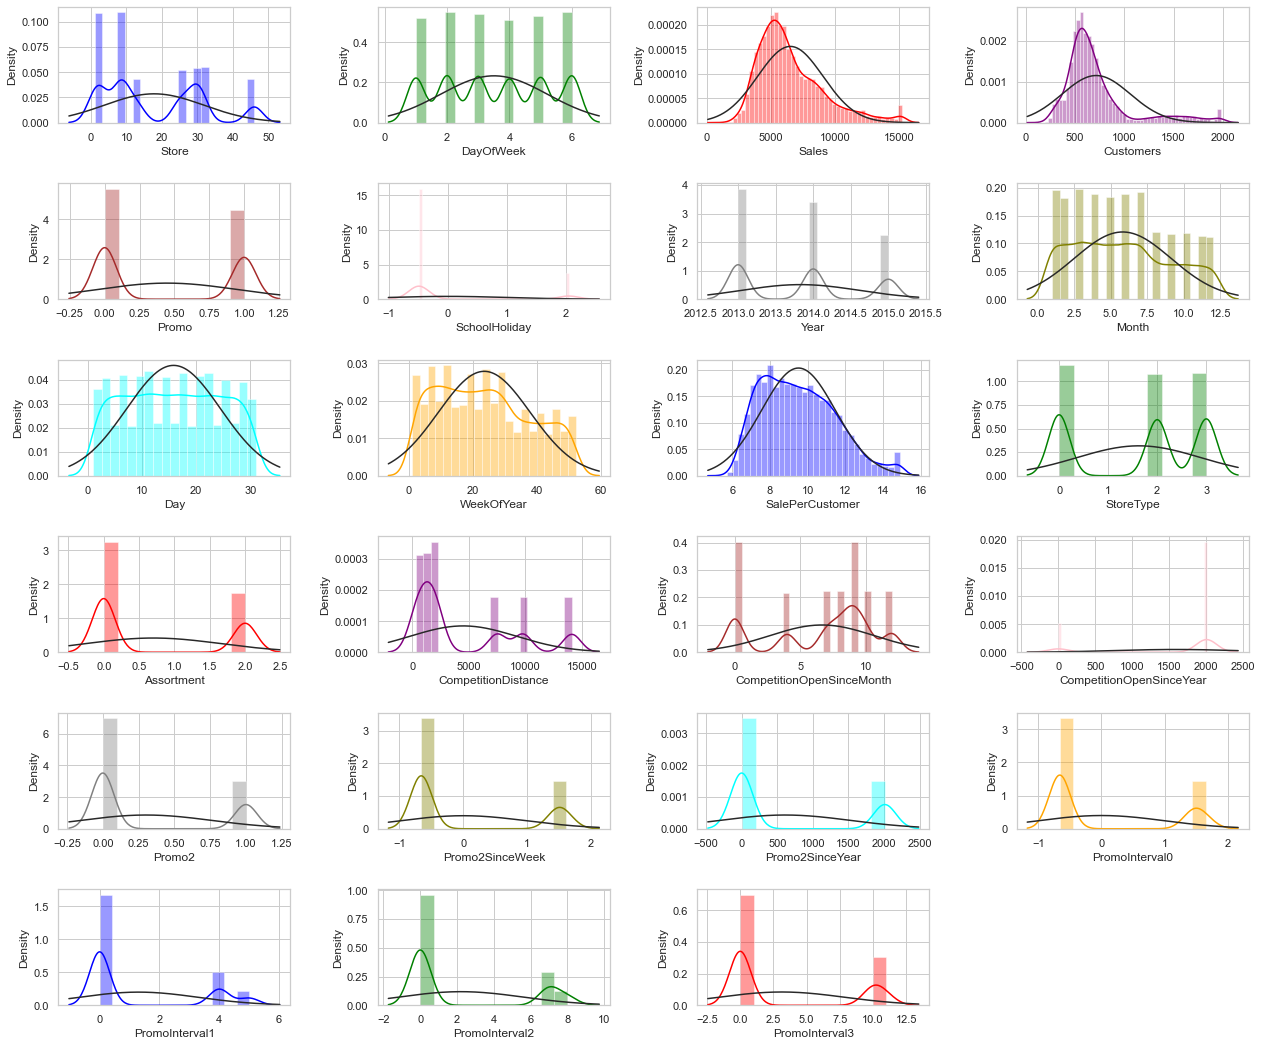

In [73]:
# Plot few distribution plots for verifying the skewness check after applying the power transformer.
plt.figure(figsize = (18,15))
sns.set(style="whitegrid")
index=1
for i in df_train_store.columns:
    if i not in ['Open', 'StateHoliday']:
        plt.subplot(6,4,index)
        c = color_list[index % (len(color_list))]
        sns.distplot(df_train_store[i],fit=norm, color=c)
        plt.tight_layout(pad=2.0)
        index=index+1
plt.show();

### Inference
The plots above are distrubtion plots for all variables. After undergoing the power transform, all the plots are symmetric or low skewness, other than Sales and Customers. Which will be taken care of in model building steps.  

### 6.1.3 Normality check for Sales

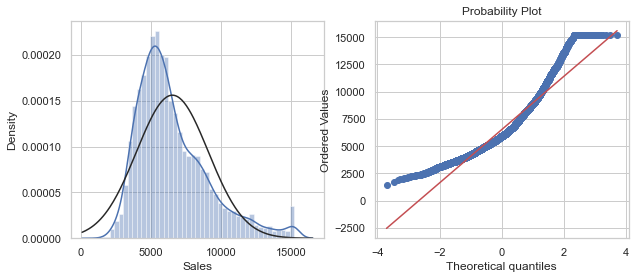

In [74]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_train_store['Sales'], fit=norm, ax=ax1);
res = stats.probplot(df_train_store['Sales'], plot=ax2)

### Inference
The Sales seems to be high skewness and will perform the Normality/variance check during the model build steps

### 6.1.4 Normality check for Customer

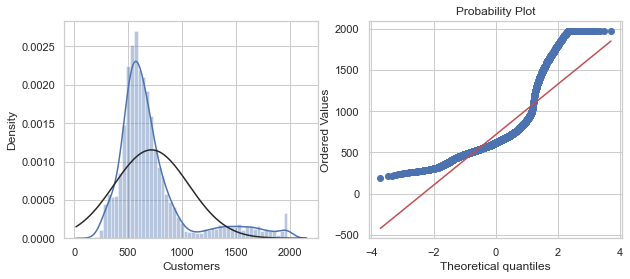

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_train_store['Customers'], fit=norm, ax=ax1);
res = stats.probplot(df_train_store['Customers'], plot=ax2)

### Inference
The Customers and Customers seems to be high skewness and will perform the Normality/variance check during the model build steps and now we will be transform the rest of high skewed variable with power transformer.

In [76]:
df_train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'Year', 'Month', 'Day', 'WeekOfYear', 'SalePerCustomer', 'StoreType',
       'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval0', 'PromoInterval1', 'PromoInterval2',
       'PromoInterval3'],
      dtype='object')

In [77]:
# Baseline the data set.
df_train_store_baseline = df_train_store.copy()

## Rollback.
#df_train_store = df_train_store_baseline.copy()

### 6.1.5 Variable Declaration

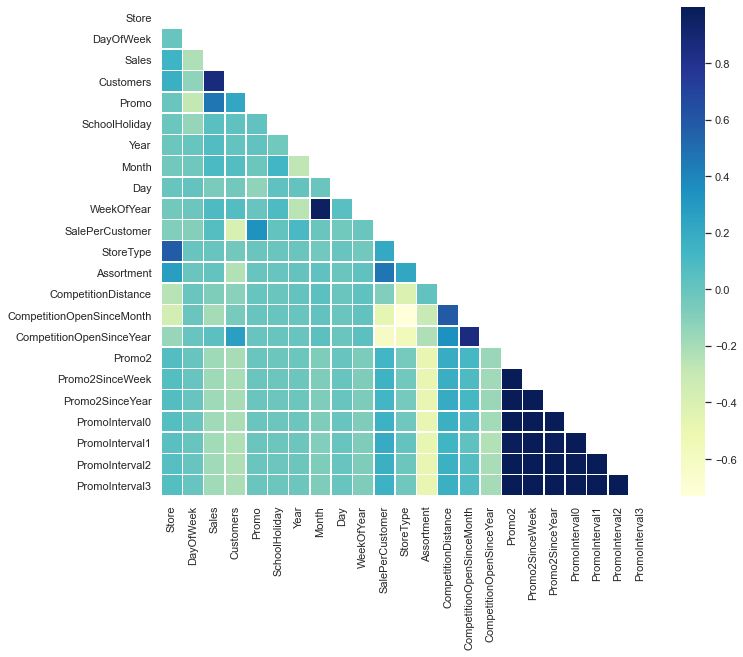

In [78]:
# Compute the correlation matrix 
# exclude 'Open' variable
corr_all = df_train_store.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_all, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_all, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "YlGnBu")      
plt.show()

### Inference
According to the plots above, "Customers" and "Sales" have the highest correlation factors amongst all the variables, hence why we defined them as endogenus variables. Furthermore, if we consider indiviusal relationships that affect these two endogenus variables, we would have to consider all of the variables listed on the plot. Since, all the variables are somehow affecting the endogenus variables without being affected by them. Some of the most noteable ones include 'Promo', 'SchoolHoliday', 'DayOfWeek', 'CompetitionOpenSinceYear'  and 'CompetitiveDistance'. Since we're doing an overall prediction as oppose to a certain store prediction, these 5 are the most vital ones. 

In [79]:
col=['Promo', 'Promo2', 'SchoolHoliday', 'DayOfWeek', 'CompetitionDistance', 
           'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

for i in col:
    print(i, Counter(df_train_store[i]))

Promo Counter({0: 3687, 1: 2992})
Promo2 Counter({0: 4657, 1: 2022})
SchoolHoliday Counter({-0.4894962032910748: 5388, 2.042916764781031: 1291})
DayOfWeek Counter({2: 1146, 6: 1146, 3: 1129, 5: 1103, 1: 1091, 4: 1064})
CompetitionDistance Counter({7520.0: 784, 9800.0: 784, 1270.0: 781, 14130.0: 779, 2030.0: 779, 2170.0: 779, 430.0: 750, 1200.0: 622, 310.0: 621})
CompetitionOpenSinceMonth Counter({9.0: 1403, 0.0: 1400, 10.0: 784, 7.0: 784, 12.0: 779, 8.0: 779, 4.0: 750})
CompetitionOpenSinceYear Counter({0.0: 1400, 2014.0: 784, 2012.0: 784, 2008.0: 781, 2006.0: 779, 2000.0: 779, 2003.0: 750, 2005.0: 622})


In [80]:
# Endogenous variables
endgvar = ['Sales', 'Customers']

# Exogenous variables
exogvar = ['Promo', 'Promo2', 'SchoolHoliday', 'DayOfWeek', 'CompetitionDistance', 
           'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']

## Convert time series period to weekly aggreagation

In [81]:
df_sales = df_train_store.copy()
df_sales = df_sales.sort_index(ascending = True)

# Select the proper time period for weekly aggreagation
df_sales = df_sales.resample('W').sum()
df_sales.head()

Store  DayOfWeek     Sales  Customers  Promo  SchoolHoliday  \
Date                                                                      
2013-01-06    660        162  194940.0   23595.00      0      53.285700   
2013-01-13    990        189  377703.0   40374.88     45     -13.770730   
2013-01-20    990        189  253178.0   32033.00      0     -26.432795   
2013-01-27    990        189  348486.0   38063.00     45     -26.432795   
2013-02-03    990        189  290891.0   34676.00      0     -26.432795   

              Year  Month   Day  WeekOfYear  SalePerCustomer  StoreType  \
Date                                                                      
2013-01-06   72468     36   126          36       316.719118         60   
2013-01-13  108702     54   513         108       533.869828         90   
2013-01-20  108702     54   891         162       458.232789         90   
2013-01-27  108702     54  1269         216       527.909112         90   
2013-02-03  108702     72  1089         270       482.023161         90   

            Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
Date                                                                     
2013-01-06          24             155440.0                      236.0   
2013-01-13          36             233160.0                      354.0   
2013-01-20          36             233160.0                      354.0   
2013-01-27          36             233160.0                      354.0   
2013-02-03          36             233160.0                      354.0   

            CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Date                                                            
2013-01-06                   56192.0      12         2.441016   
2013-01-13                   84288.0      18         3.661524   
2013-01-20                   84288.0      18         3.661524   
2013-01-27                   84288.0      18         3.661524   
2013-02-03                   84288.0      18         3.661524   

            Promo2SinceYear  PromoInterval0  PromoInterval1  PromoInterval2  \
Date                                                                          
2013-01-06          24124.0        2.454813            52.0            88.0   
2013-01-13          36186.0        3.682219            78.0           132.0   
2013-01-20          36186.0        3.682219            78.0           132.0   
2013-01-27          36186.0        3.682219            78.0           132.0   
2013-02-03          36186.0        3.682219            78.0           132.0   

            PromoInterval3  
Date                        
2013-01-06           124.0  
2013-01-13           186.0  
2013-01-20           186.0  
2013-01-27           186.0  
2013-02-03           186.0

### 6.1.6 Plot Time series for Sales & Customers

In [82]:
def time_series_plt(df, lst, title):
    rcParams['figure.figsize'] = 20,10
    k=1
    for i in lst:
        ax=plt.subplot(len(lst),2,k)
        c = color_list[k % (len(color_list))]
        plt.plot(df[i], label='Train', color=c)
        plt.title(title+' '+i, fontsize=15)
        plt.xticks(rotation=45)
        plt.legend(loc='best')
        k +=1

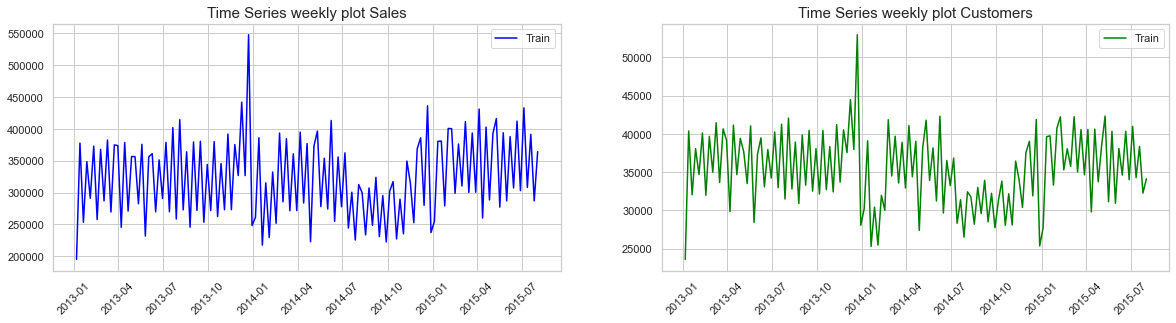

In [83]:
time_series_plt(df_sales, endgvar, 'Time Series weekly plot')

### Inference
The time series plots above for Sales and Customers, show similar trends and strong correlation to each other. A seasonal pattern can also be observed in both the plots shown above.

### 6.2 Decompose the Data

### 6.2.1 Additive seasonal decomposition

In [84]:
# graphs to show seasonal_decompose
def seasonal_decompose (y,mod):
    rcParams['figure.figsize'] = 12,8
    decomposition = sm.tsa.seasonal_decompose(y, model=mod,extrapolate_trend='freq')
    return(decomposition)

Sales: 349.99926106373823


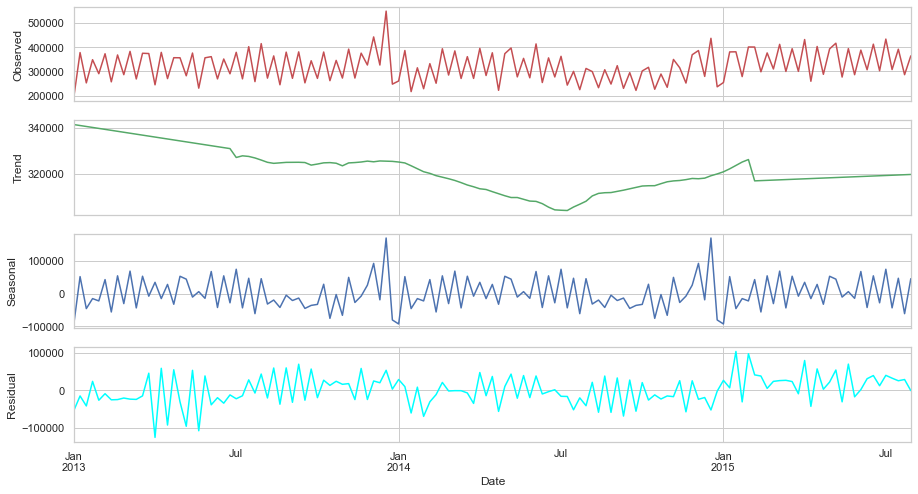

In [85]:
# Sales Additive seasonal decomposition
res = seasonal_decompose(df_sales['Sales'], 'additive')
plot_seasonality(res)
print('Sales:', res.resid.mean())

### Inference
The above plot shown above is on a weekly basis. Furthermore, it is also based on additive for sale data. There is seasonal trend shown above, as there is a peak during the winter seasonal months and a decrease during the summer months. 

Customers: 7.070895328878603


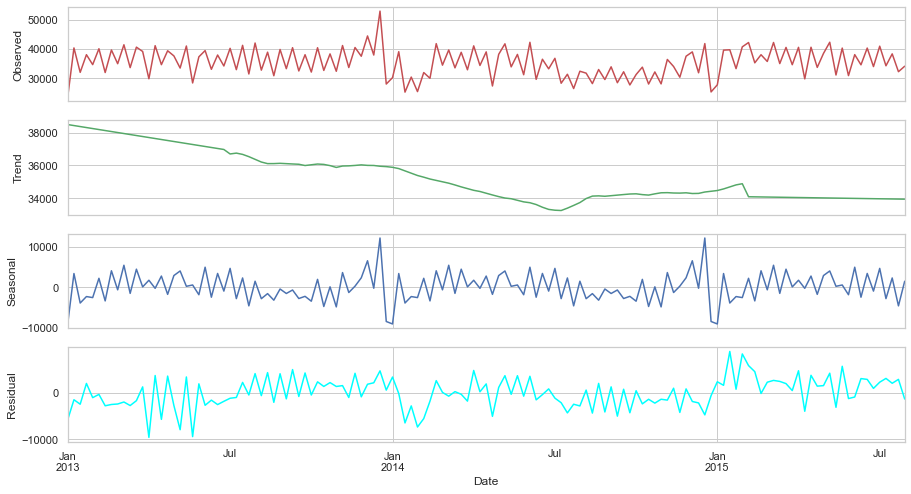

In [86]:
# Customers Sales Additive seasonal decomposition
res = seasonal_decompose(df_sales['Customers'], 'additive')
plot_seasonality(res)
print('Customers:', res.resid.mean())

### Inference
The above plot shown above is also on a weekly basis. However, this one is based on additve for Customer data. There is seasonal trend shown above, as there is a peak during the winter seasonal months and a decrease during the summer months. Similarly to the additive plot for sales data. 

### 6.2.2 Multiplicative seasonal decomposition

Sales: 1.0013184509706952


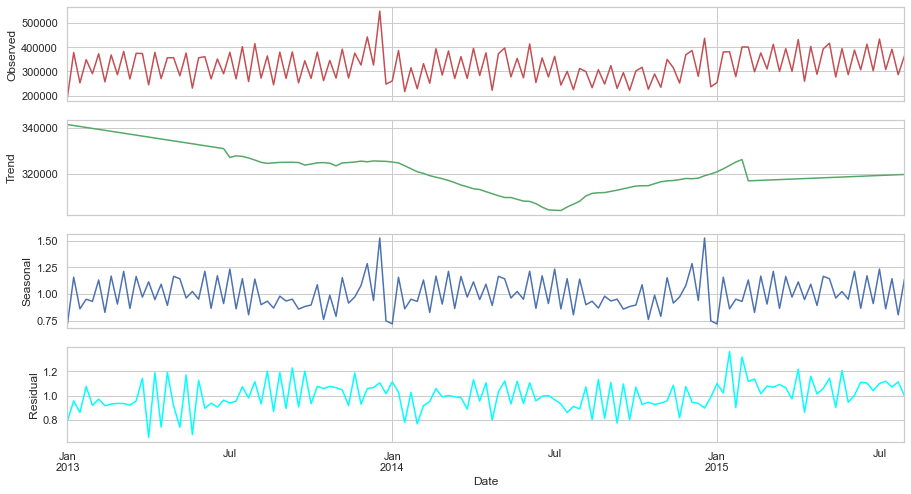

In [87]:
# Sales Multiplicative seasonal decomposition
res = seasonal_decompose(df_sales['Sales'], 'multiplicative')
plot_seasonality(res)
print('Sales:', res.resid.mean())

### Inference
The above plot shown above is also on a weekly basis. Additonally, its based on the multiplicative decomposition for Sales data. As seen from the additive sales/customer plot this plot also shows a similar trend based on seasons. For example, peak during winter seasons and fall during summer. 

Customers: 1.0008593574988702


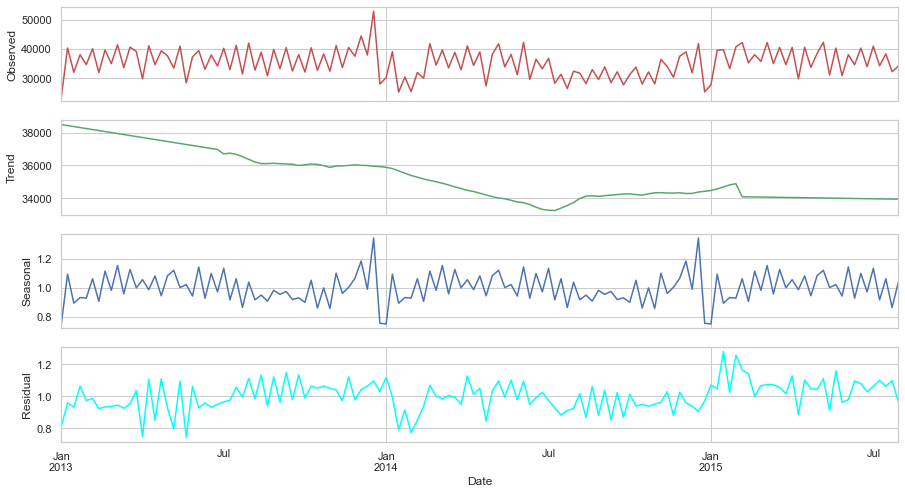

In [88]:
# Customers Multiplicative seasonal decomposition
res = seasonal_decompose(df_sales['Customers'], 'multiplicative')
plot_seasonality(res)
print('Customers:', res.resid.mean())

### Inference
The above plot shown above is also on a weekly basis. In contrast to the plot above, its based on the multiplicative decomposition for Customer data. As seen from the additive sales/customer plot this plot also shows a similar trend based on seasons. For example, peak during winter seasons and fall during summer. 

In [89]:
#Finding the Seasonality freq for Sales.
lst = [7, 30, 45]
print('-----additive------')
for i in lst:
    res = sm.tsa.seasonal_decompose(df_sales.Sales, model='additive', extrapolate_trend='freq', period=i)
    print(i, res.resid.mean())
print('')
print('-----multiplicative------')
for i in lst:
    res = sm.tsa.seasonal_decompose(df_sales.Sales, model='multiplicative', extrapolate_trend='freq', period=i)
    print(i, res.resid.mean())

-----additive------
7 -568.9614633266648
30 -2970.464946232859
45 1001.4147449665028

-----multiplicative------
7 0.9995178528124539
30 0.9912648022625452
45 1.0027023417374796


### Inference
For Sales additive decomposition models, the trend shows that there is a minimal residual when tested on a weekly basis. On the other hand, the trend shows that there is minimal residual when tested on a monthly basis for mulitplicative decomposition models. 

In [90]:
#Finding the Seasonality freq for Customers.
lst = [7, 30, 45]
print('-----additive------')
for i in lst:
    res = sm.tsa.seasonal_decompose(df_sales.Customers, model='additive', extrapolate_trend='freq', period=i)
    print(i, res.resid.mean())
print('')
print('-----multiplicative------')
for i in lst:
    res = sm.tsa.seasonal_decompose(df_sales.Customers, model='multiplicative', extrapolate_trend='freq', period=i)
    print(i, res.resid.mean())

-----additive------
7 -76.34534440693314
30 -348.5120922914372
45 -4.036745133494318

-----multiplicative------
7 0.997900494189304
30 0.9905824862055407
45 1.000075533159541


### Inference
Similarily the customer data also follows the same trend as sales data. For additive decomposition models, the trend shows that there is a minimal residual when tested on a weekly basis. On the other hand, the trend shows that there is minimal residual when tested on a monthly basis for mulitplicative decomposition models.

## 6.3 Split time series data into training and test set

In [91]:
train_len = len(df_sales) - 6 ## future 6 weeks
train = df_sales[0:train_len]
test = df_sales[train_len:]
train.shape, test.shape

((129, 23), (6, 23))

# 7. Build and evaluate time series forecast
Let's start with the model building process with Exponential smoothing Model. Lets consider all store time series data for analysis and forecasting

### M1. Exponential smoothing Model

In [92]:
#Sales
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.05, smoothing_slope=0.05, optimized=True)
print(model_fit.params)
df_forecast = test.copy()
df_forecast['Sales'] = model_fit.forecast(len(test))

{'smoothing_level': 0.05, 'smoothing_slope': 0.05, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 324828.5260539185, 'initial_slope': 164.97761157275272, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

In [93]:
def plt_time_series_1var(col, title):
    plt.figure(figsize=(12,4))
    plt.plot(train[col], label='Train')
    plt.plot(test[col], label='Test')
    plt.plot(df_forecast[col][test.index.min():], label=title+' forecast')
    plt.legend(loc='best')
    plt.title(title+' Model for '+col)
    plt.show()

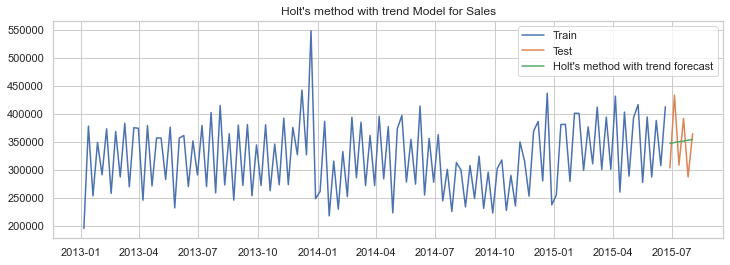

In [94]:
plt_time_series_1var('Sales', 'Holt\'s method with trend')

### Calculate RSME and MAPE

In [95]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error
def cal_rmse_mape(results, method, col):
    forecast_errors = [test[col][i]- df_forecast[col][i] for i in range(len(test[col]))]
    bias = np.round(sum(forecast_errors) * 1.0/len(test[col]),4)
    mae = np.round(mean_absolute_error(test[col],df_forecast[col]),4)
    mse = np.round(mean_squared_error(test[col], df_forecast[col]),4)
    rmse = np.round(np.sqrt(mean_squared_error(test[col], df_forecast[col])),4)
    mpe = np.round(np.mean((df_forecast[col] - test[col])/test[col]),4)
    mape = np.round(np.mean(np.abs(test[col]-df_forecast[col])/test[col])*100,4)
    tempResults = pd.DataFrame({'Model':[method],'RMSE':[rmse],'MAPE':[mape], 'MPE':[mpe],
                                'Bias':bias, 'MAE':mae, 'MSE':mse})
    results = pd.concat([results, tempResults])
    results = results[['Model','Bias','MAE','MPE','MAPE','MSE','RMSE']]
    return(results)

In [96]:
# Create empty result dataframe.
results= pd.DataFrame(columns=['Model','Bias','MAE','MPE','MAPE','MSE','RMSE'])

In [97]:
results = cal_rmse_mape(results, 'Holt\'s exponential smoothing method - Sales', 'Sales')
results

Model       Bias         MAE     MPE  \
0  Holt's exponential smoothing method - Sales -2631.2591  47808.8549  0.0303   

      MAPE           MSE        RMSE  
0  13.9458  2.816789e+09  53073.4261

In [98]:
#For Customers
model = ExponentialSmoothing(np.asarray(train['Customers']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.05, smoothing_slope=0.05, optimized=True)
print(model_fit.params)
df_forecast = test.copy()
df_forecast['Customers'] = model_fit.forecast(len(test))

{'smoothing_level': 0.05, 'smoothing_slope': 0.05, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 36974.117784669725, 'initial_slope': 0.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


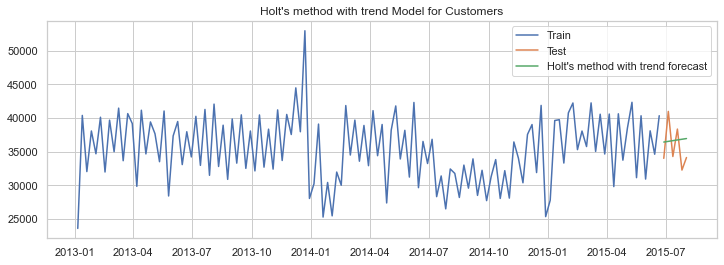

Model       Bias         MAE  \
0      Holt's exponential smoothing method - Sales -2631.2591  47808.8549   
0  Holt's exponential smoothing method - Customers -1016.3223   3037.4202   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366

In [99]:
plt_time_series_1var('Customers', 'Holt\'s method with trend')
results = cal_rmse_mape(results, 'Holt\'s exponential smoothing method - Customers', 'Customers')
results

### M2. Holt Winters' additive Model with trend and seasonality

In [100]:
# For Sales
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
df_forecast = test.copy()
df_forecast['Sales'] = model_fit.forecast(len(test))

{'smoothing_level': 0.05263157894736657, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.26315789473686796, 'damping_slope': nan, 'initial_level': 332143.58181818016, 'initial_slope': 560.1491666666487, 'initial_seasons': array([-137203.58181817,   45559.4181818 ,  -78965.58181817,
         16342.41818181,  -41252.58181818,   40727.09818181,
        -74631.58181818,   35768.09818181,  -45267.58181819,
         50483.09818181,  -62844.58181818,   42719.09818181]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

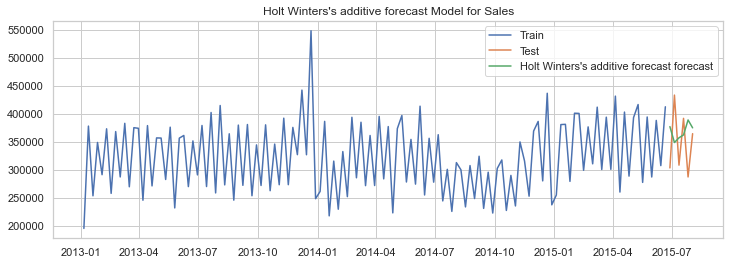

Model        Bias         MAE  \
0      Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0  Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0         Holt Winters's additive forecast - Sales -20086.5867  58179.7833   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139

In [101]:
plt_time_series_1var('Sales', 'Holt Winters\'s additive forecast')
results = cal_rmse_mape(results, 'Holt Winters\'s additive forecast - Sales', 'Sales')
results

In [102]:
# Customers
model = ExponentialSmoothing(np.asarray(train['Customers']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
df_forecast = test.copy()
df_forecast['Customers'] = model_fit.forecast(len(test))

{'smoothing_level': 0.09353642567582636, 'smoothing_slope': 1.3844563760732157e-08, 'smoothing_seasonal': 1.9661556268943714e-07, 'damping_slope': nan, 'initial_level': 36097.05426380629, 'initial_slope': 16.647040466232408, 'initial_seasons': array([-1.85940315e+02, -1.47022964e+03,  2.65176869e+03, -1.99317664e+03,
        1.24767395e+03,  4.84633005e+01, -1.33901878e+03, -2.04885709e+00,
       -2.75536159e+03, -3.90349902e+02,  1.36241807e+03,  2.84945880e+01]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

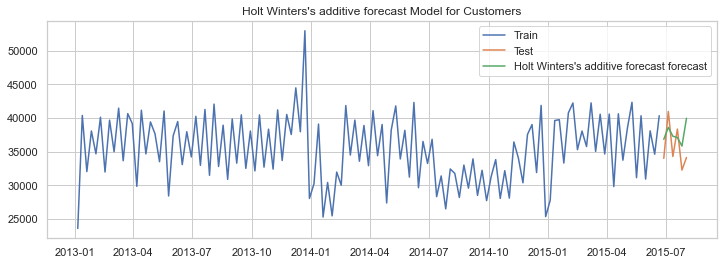

Model        Bias         MAE  \
0      Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0  Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0         Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0     Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291

In [103]:
plt_time_series_1var('Customers', 'Holt Winters\'s additive forecast')
results = cal_rmse_mape(results, 'Holt Winters\'s additive forecast - Customers', 'Customers')
results

### M3. Holt Winter's multiplicative Model with trend and seasonality

In [104]:
#For Sales
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
df_forecast = test.copy()
df_forecast['Sales'] = model_fit.forecast(len(test))

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.3157894736842105, 'damping_slope': nan, 'initial_level': 332143.58181818185, 'initial_slope': 560.1491666666684, 'initial_seasons': array([0.58691485, 1.13716784, 0.76225468, 1.04920287, 0.87579895,
       1.12261895, 0.77530325, 1.10768866, 0.8637108 , 1.15199179,
       0.81079092, 1.12861636]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


### Plot train, test and forecast

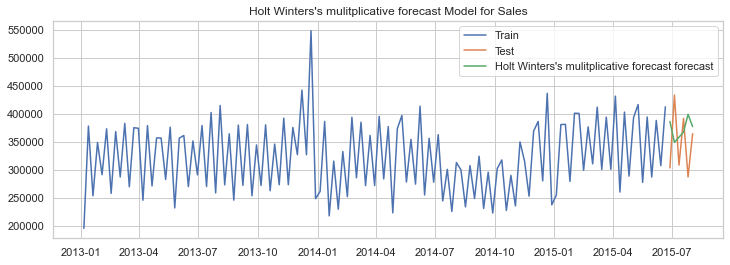

Model        Bias         MAE  \
0      Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0  Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0         Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0     Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0   Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473

In [105]:
plt_time_series_1var('Sales', 'Holt Winters\'s mulitplicative forecast')
results = cal_rmse_mape(results, 'Holt Winters\'s mulitplicative forecast - Sales', 'Sales')
results

In [106]:
#For Customers
model = ExponentialSmoothing(np.asarray(train['Customers']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
df_forecast = test.copy()
df_forecast['Customers'] = model_fit.forecast(len(test))

{'smoothing_level': 0.05263158865465182, 'smoothing_slope': 0.05263157841711851, 'smoothing_seasonal': 0.31578947062067797, 'damping_slope': nan, 'initial_level': 36126.38909008943, 'initial_slope': 24.04111086477204, 'initial_seasons': array([0.96419092, 0.99712607, 1.06613635, 0.96990672, 1.0335218 ,
       1.03448051, 0.9667229 , 1.03024593, 0.94721485, 1.02931772,
       1.03929626, 1.0359479 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


### Plot train, test and forecast

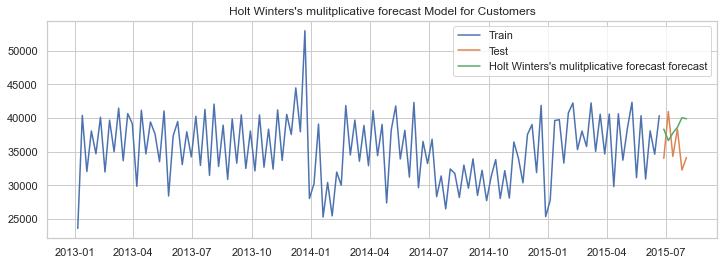

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584

In [107]:
plt_time_series_1var('Customers', 'Holt Winters\'s mulitplicative forecast')
results = cal_rmse_mape(results, 'Holt Winters\'s mulitplicative forecast - Customers', 'Customers')
results

### 7.1 Testing for Stationarity
#### Augmented Dickey-Fuller (ADF) test

In [108]:
### plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=2).mean() 
    rolstd = pd.Series(timeseries).rolling(window=2).std()
    
    fig, ax = plt.subplots(figsize=(15, 4))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

In [109]:
# user define function for ADF test
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = ts.adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

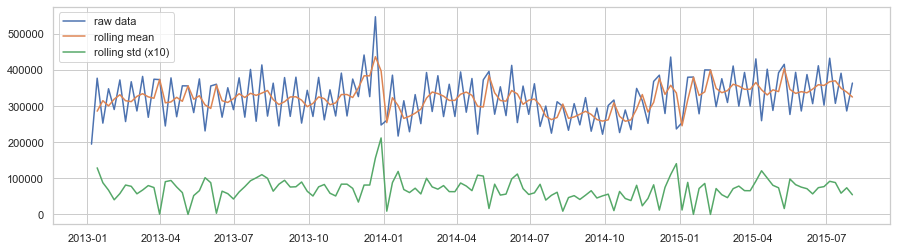

In [110]:
#pd.options.display.float_format = '{:.8f}'.format
test_stationarity(df_sales['Sales'],'raw data')

### Inference
Both the mean and standard deviation for stationary data does not change much over time. But in this case, since the y-axis has such a large scale, we can not confidently conclude that our data is stationary by simply viewing the above graph. Therefore, we should do another test of stationarity.

### Guidelines:
#### Augmented Dickey-Fuller (ADF) Test
    1) Null Hypothesis (H0): The series is not stationary
        - p−value>0.05
    2) Alternate Hypothesis (H1): The series is stationary
        - p−value≤0.05
        
#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
    1) Null Hypothesis (H0): The series is stationary
        - p−value>0.05
    2) Alternate Hypothesis (H1): The series is not stationary
        - p−value≤0.05

In [111]:
# ADF Test on each column
for name, column in df_sales[endgvar].iteritems():
    adfuller_test(column, name=column.name)

    Augmented Dickey-Fuller Test on "Sales" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.474
 No. Lags Chosen       = 3
 Critical value 1%     = -3.481
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.0087. Rejecting Null Hypothesis.
 => Series is Stationary.
    Augmented Dickey-Fuller Test on "Customers" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.2338
 No. Lags Chosen       = 2
 Critical value 1%     = -3.481
 Critical value 5%     = -2.884
 Critical value 10%    = -2.579
 => P-Value = 0.0006. Rejecting Null Hypothesis.
 => Series is Stationary.


### Infrenece
After select the proper time period for weekly aggreagation, the ADF test shows that Sales and Customers variables time series are stationary, since -
**Sales**
- P-Value = 0.0087. Rejecting Null Hypothesis.
- Series is Stationary.

**Customers**
- P-Value = 0.0006. Rejecting Null Hypothesis.
- Series is Stationary.
 
Lets perform Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test for the same variables.

### 6.4.2 Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [112]:
kpss_test = kpss(df_sales['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.169352
Critical Values @ 0.05: 0.46
p-value: 0.100000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### Inference
Since p-value is more that 0.05 the Sales time series is stationary. Also we need to perform the skewness check to make the variation constant.

In [113]:
kpss_test = kpss(df_sales['Customers'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.150598
Critical Values @ 0.05: 0.46
p-value: 0.100000


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


### Inference
Since p-value is more that 0.05 the Customers time series is stationary. Also we need to perform the skewness check to make the variation constant.

### 7.2 Skewness and variance check

In [114]:
## Perform the variance test.
cols = ['Sales','Customers']

for i in cols:
    print("--- "+i+" ---")
    print("Skewness: %f" % df_sales[i].skew())
    print("Kurtosis: %f" % df_sales[i].kurt())

--- Sales ---
Skewness: 0.294092
Kurtosis: -0.349139
--- Customers ---
Skewness: 0.068850
Kurtosis: 0.028248


### Inference
As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric. 

As per the  Sales and Customers Skewness result showns above, both time series are symmetric. Hence no need to perform the transformation for variance.

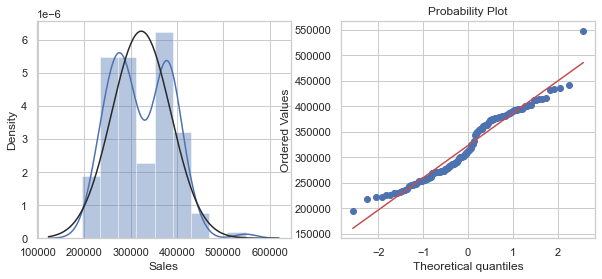

In [115]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_sales['Sales'], fit=norm, ax=ax1);
res = stats.probplot(df_sales['Sales'], plot=ax2)

### Inference
As per sales distribution shown there is no variation in data set.

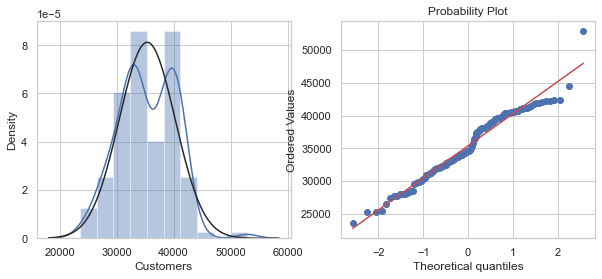

In [116]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

sns.distplot(df_sales['Customers'], fit=norm, ax=ax1);
res = stats.probplot(df_sales['Customers'], plot=ax2)

### Inference
As per Customers distribution shown there is no variation in data set.

### 7.3 ACF and PACF plot

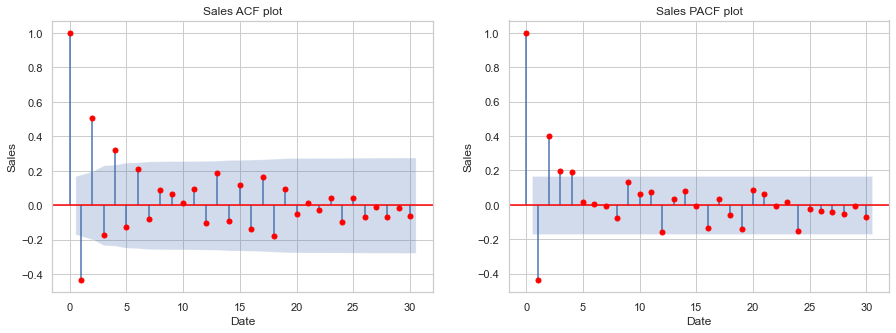

In [117]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
plot_acf(df_sales['Sales'], lags = 30, ax=ax1, c=c)
ax1.set_title('Sales ACF plot')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales')
plot_pacf(df_sales['Sales'], lags = 30, ax = ax2, c=c)
ax2.set_title('Sales PACF plot')
ax2.set_xlabel('Date')
ax2.set_ylabel('Sales')
plt.show()

### Inference
As per above ACF plots for Sales shown, there are 3 significant data points above the ACF highlighted marks. if we consider the MA model, it will be considered as MA (3), Hence `q` will be 3. if we consider the AR model, it will be considered as AR (4) and `p` will be 4 since there are 4 data points that cross the PACF highlighted marks and order differencing `d` will be 0 as the sales time series has been stationary without any differencing.
- p = number of significant terms in PACF for trend is: `4`.
- d = Order of differencing for trend: `0`
- q= number of significant terms in ACF for trend: `3`

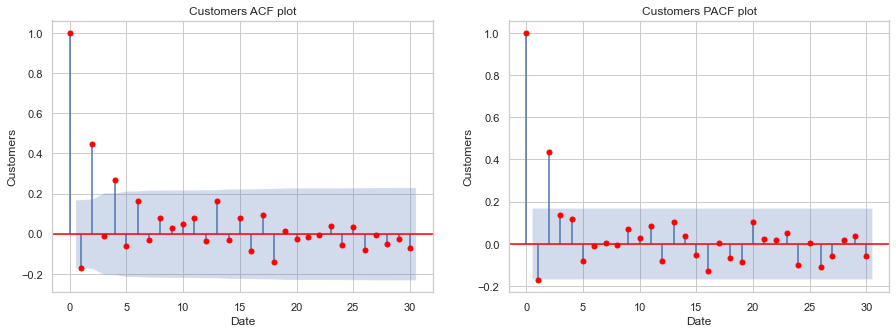

In [118]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
plot_acf(df_sales['Customers'], lags = 30, ax=ax1, c=c)
ax1.set_title('Customers ACF plot')
ax1.set_xlabel('Date')
ax1.set_ylabel('Customers')
plot_pacf(df_sales['Customers'], lags = 30, ax = ax2, c=c)
ax2.set_title('Customers PACF plot')
ax2.set_xlabel('Date')
ax2.set_ylabel('Customers')
plt.show()

### Inferenece
As per above ACF plots for Customers shown, there are 3 data points above the ACF highlighted marks. Hence `q` will be 3, `p` will be 2 since there are 2 data points that cross the PACF highlighted marks and order differencing `d` will be 0 as the sales time series has been stationary without any differencing.
- p = number of significant terms in PACF for trend is: `2`.
- d = Order of differencing for trend: `0`
- q= number of significant terms in ACF for trend: `3`

## M4. Auto Regressive(AR) Model

In [119]:
# As per ACF & PACF plot show the Sales (p,d,q) will be (4,0,3)
mod = ARIMA(train['Sales'], order=(4, 0, 0)) 
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  129
Model:                     ARMA(4, 0)   Log Likelihood               -1582.420
Method:                       css-mle   S.D. of innovations          51266.658
Date:                Sun, 04 Apr 2021   AIC                           3176.840
Time:                        22:21:15   BIC                           3193.998
Sample:                    01-06-2013   HQIC                          3183.812
                         - 06-21-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.22e+05   7446.115     43.242      0.000    3.07e+05    3.37e+05
ar.L1.Sales    -0.3862      0.087     -4.433      0.000      -0.557      -0.215
ar.L2.Sales     0.3523      0.090      3.896      0.000       0.175       0.530
ar.L3.Sales     0.2530      0.091      2.781      0.005       0.075       0.431
ar.L4.Sales     0.1887      0.087      2.164      0.031       0.018       0.360
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2428           -0.0000j            1.2428           -0.0000
AR.2           -1.2501           -0.0000j            1.2501           -0.5000
AR.3           -0.6666           -1.7223j            1.8468           -0.3088
AR.4           -0.6666           +1.7223j            1.8468            0.3088
-----------------------------------------------------------------------------
"""

In [120]:
#Forecast for Sales.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Sales'])

In [121]:
def plt_time_series_1var(col, title):
    plt.figure(figsize=(12,4))
    plt.plot(train[col], label='Train')
    plt.plot(test[col], label='Test')
    plt.plot(df_forecast[col][test.index.min():], label=title+' forecast')
    plt.legend(loc='best')
    plt.title(title+' Model for '+col)
    plt.show()

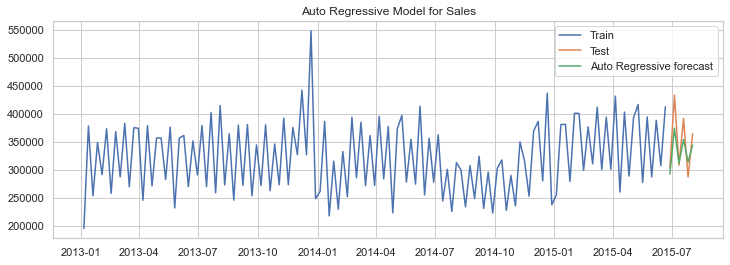

In [122]:
plt_time_series_1var('Sales', 'Auto Regressive')

### Calculate RMSE and MAPE

In [123]:
results = cal_rmse_mape(results, 'AR - Sales', 'Sales')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783

In [124]:
# As per ACF & PACF plot show the Customers (p,d,q) will be (2,0,3)
mod = ARIMA(train['Customers'], order=(2, 0, 0)) 
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Customers   No. Observations:                  129
Model:                     ARMA(2, 0)   Log Likelihood               -1265.947
Method:                       css-mle   S.D. of innovations           4415.026
Date:                Sun, 04 Apr 2021   AIC                           2539.894
Time:                        22:21:16   BIC                           2551.333
Sample:                    01-06-2013   HQIC                          2544.542
                         - 06-21-2015                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.536e+04    584.414     60.497      0.000    3.42e+04    3.65e+04
ar.L1.Customers    -0.1030      0.080     -1.284      0.199      -0.260       0.054
ar.L2.Customers     0.4438      0.080      5.522      0.000       0.286       0.601
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3896           +0.0000j            1.3896            0.5000
AR.2            1.6216           +0.0000j            1.6216            0.0000
-----------------------------------------------------------------------------
"""

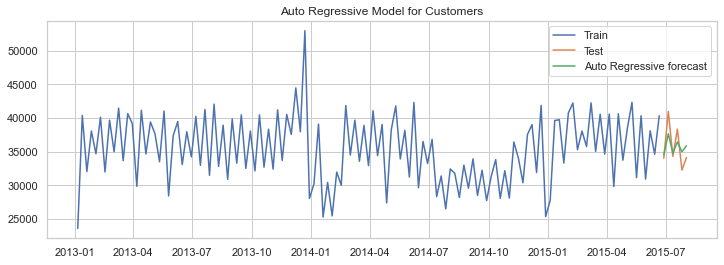

In [125]:
#Forecast for Customers.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Customers'])

plt_time_series_1var('Customers', 'Auto Regressive')

In [126]:
results = cal_rmse_mape(results, 'AR - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820

## M5. Moving average model (MA)

In [127]:
# As per ACF & PACF plot show the Sales (p,d,q) will be (4,0,3)
mod = ARIMA(train['Sales'], order=(0, 0, 3)) 
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  129
Model:                     ARMA(0, 3)   Log Likelihood               -1588.589
Method:                       css-mle   S.D. of innovations          53845.375
Date:                Sun, 04 Apr 2021   AIC                           3187.179
Time:                        22:21:17   BIC                           3201.478
Sample:                    01-06-2013   HQIC                          3192.989
                         - 06-21-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.22e+05   4877.854     66.009      0.000    3.12e+05    3.32e+05
ma.L1.Sales    -0.3998      0.097     -4.133      0.000      -0.589      -0.210
ma.L2.Sales     0.4083      0.070      5.843      0.000       0.271       0.545
ma.L3.Sales     0.0241      0.097      0.248      0.804      -0.166       0.214
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.5250           -1.4249j            1.5186           -0.1938
MA.2            0.5250           +1.4249j            1.5186            0.1938
MA.3          -18.0082           -0.0000j           18.0082           -0.5000
-----------------------------------------------------------------------------
"""

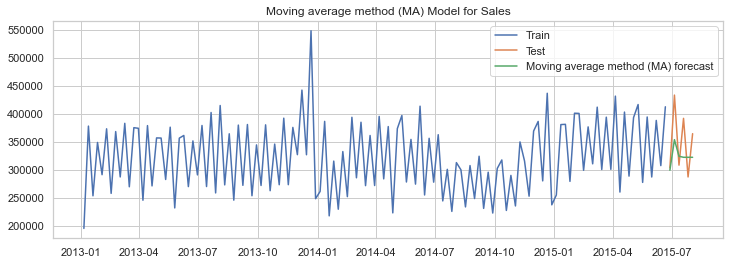

In [128]:
#Forecast for Sales.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Sales'])

plt_time_series_1var('Sales', 'Moving average method (MA)')

In [129]:
results = cal_rmse_mape(results, 'MA - Sales', 'Sales')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066

In [130]:
# As per ACF & PACF plot show the Customers (p,d,q) will be (2,0,3)
mod = ARIMA(train['Customers'], order=(0, 0, 3)) 
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:              Customers   No. Observations:                  129
Model:                     ARMA(0, 3)   Log Likelihood               -1267.749
Method:                       css-mle   S.D. of innovations           4478.750
Date:                Sun, 04 Apr 2021   AIC                           2545.498
Time:                        22:21:18   BIC                           2559.797
Sample:                    01-06-2013   HQIC                          2551.308
                         - 06-21-2015                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.536e+04    494.912     71.454      0.000    3.44e+04    3.63e+04
ma.L1.Customers    -0.1880      0.089     -2.104      0.035      -0.363      -0.013
ma.L2.Customers     0.3829      0.071      5.394      0.000       0.244       0.522
ma.L3.Customers     0.0660      0.084      0.790      0.430      -0.098       0.230
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.3911           -1.4656j            1.5169           -0.2085
MA.2            0.3911           +1.4656j            1.5169            0.2085
MA.3           -6.5800           -0.0000j            6.5800           -0.5000
-----------------------------------------------------------------------------
"""

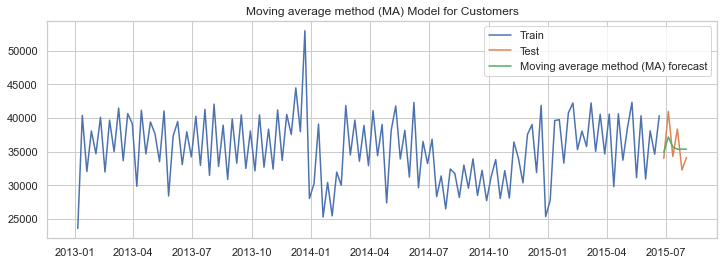

In [131]:
#Forecast for Customers.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Customers'])

plt_time_series_1var('Customers', 'Moving average method (MA)')

In [132]:
results = cal_rmse_mape(results, 'MA - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542

## M6. Auto regression moving average method (ARMA)

In [133]:
#Find the value of (p,q) form ARMA model.
import statsmodels.api as sm
result = {}
for p in range(5):
    for q in range(2):
        arma = sm.tsa.ARIMA(train['Sales'], order=(p,0,q))
        arma_fit = arma.fit()
        result[(p,q)] = arma_fit.aic

p,q = min(result, key=result.get)
print('(p,q)'+' ==> ({},{})'.format(p,q))

(p,q) ==> (2,1)


In [134]:
# As per above test the (p,q) is (2,1)
mod = ARIMA(train['Sales'], order=(2, 0, 1))
res = mod.fit()
print(res.params)

const          321981.782072
ar.L1.Sales         0.171545
ar.L2.Sales         0.585772
ma.L1.Sales        -0.558497
dtype: float64


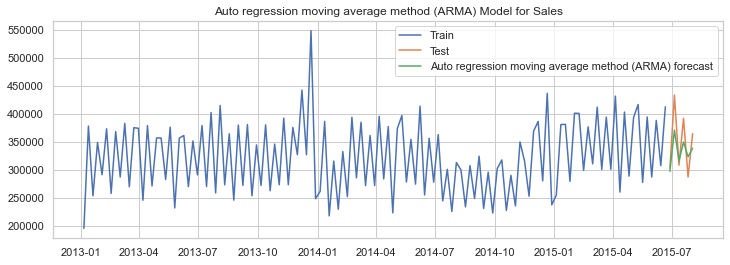

In [135]:
#Forecast for Sales.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Sales'])

plt_time_series_1var('Sales', 'Auto regression moving average method (ARMA)')

In [136]:
results = cal_rmse_mape(results, 'ARMA - Sales', 'Sales')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913

In [137]:
# Find the p,q values for Customers
result = {}
for p in range(5):
    for q in range(2):
        arma = sm.tsa.ARIMA(train['Customers'], order=(p,0,q))
        arma_fit = arma.fit()
        result[(p,q)] = arma_fit.aic

p,q = min(result, key=result.get)
print('(p,q)'+' ==> ({},{})'.format(p,q))

(p,q) ==> (2,1)


In [138]:
# As per above test the (p,q) is (2,1)
mod = ARIMA(train['Customers'], order=(2, 0, 1))
res = mod.fit()
print(res.params)

const              35355.185387
ar.L1.Customers        0.162417
ar.L2.Customers        0.490430
ma.L1.Customers       -0.339006
dtype: float64


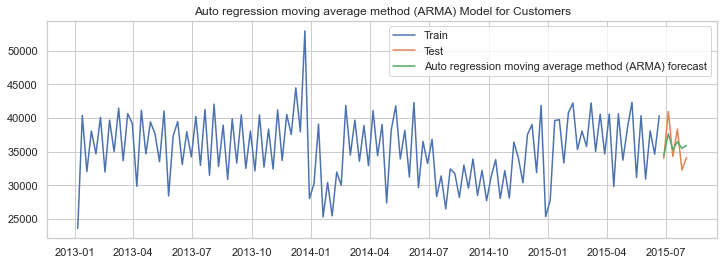

In [139]:
#Forecast for Customers.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Customers'])

plt_time_series_1var('Customers', 'Auto regression moving average method (ARMA)')

In [140]:
results = cal_rmse_mape(results, 'ARMA - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338

## M7. Auto regressive integrated moving average (ARIMA)

Since the sales and customers time series model has been stationaries without any differencing, hence d-degree of differencing will be 0

In [141]:
# Lets consider the (p,d,q) value for Sales (2,0,1)
mod = ARIMA(train['Sales'], order=(2, 0, 1))
res= mod.fit()
print(res.params)

const          321981.782072
ar.L1.Sales         0.171545
ar.L2.Sales         0.585772
ma.L1.Sales        -0.558497
dtype: float64


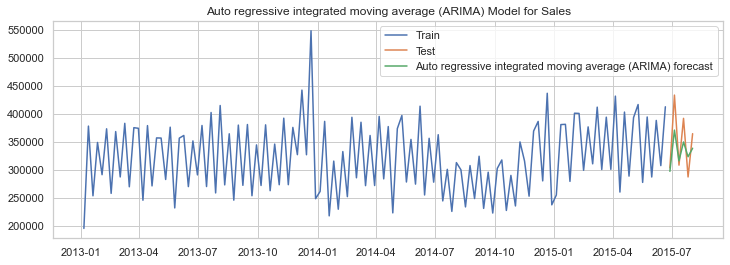

In [142]:
#Forecast for Sales.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Sales'])

plt_time_series_1var('Sales', 'Auto regressive integrated moving average (ARIMA)')

In [143]:
results = cal_rmse_mape(results, 'ARIMA - Sales', 'Sales')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913

In [144]:
# # Lets consider the (p,d,q) value for Customers also (2,0,1)
mod = ARIMA(train['Customers'], order=(2, 0, 1))
res= mod.fit()
print(res.params)

const              35355.185387
ar.L1.Customers        0.162417
ar.L2.Customers        0.490430
ma.L1.Customers       -0.339006
dtype: float64


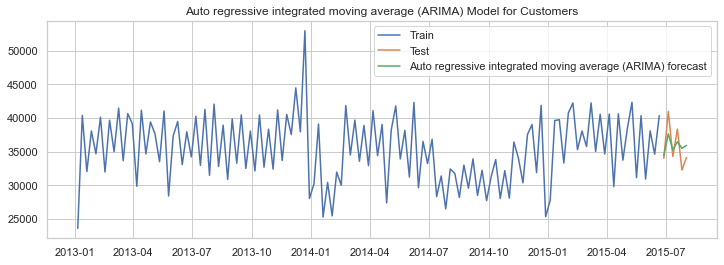

In [145]:
#Forecast for Customers.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Customers'])

plt_time_series_1var('Customers', 'Auto regressive integrated moving average (ARIMA)')

In [146]:
results = cal_rmse_mape(results, 'ARIMA - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338

## M8. Seasonal auto regressive integrated moving average (SARIMA)

In [147]:
mod = SARIMAX(train['Sales'], order=(2, 0, 1), seasonal_order=(0, 1, 1, 12)) 
res = mod.fit()
print(res.params)

ar.L1       4.453221e-01
ar.L2       5.339961e-01
ma.L1      -8.246784e-01
ma.S.L12   -8.447631e-01
sigma2      5.890385e+09
dtype: float64


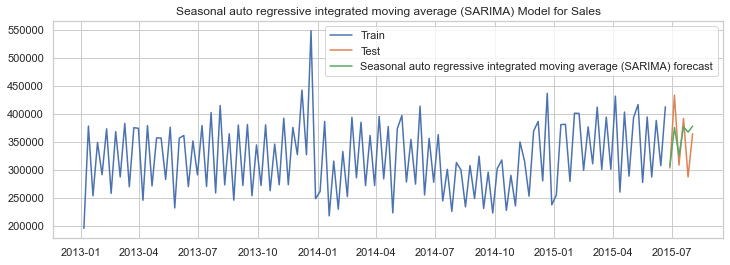

In [148]:
#Forecast for Customers.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Sales'])

plt_time_series_1var('Sales', 'Seasonal auto regressive integrated moving average (SARIMA)')

In [149]:
results = cal_rmse_mape(results, 'SARIMA - Sales', 'Sales')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424

In [150]:
#Customers
mod = SARIMAX(train['Customers'], order=(2, 0, 1), seasonal_order=(0, 1, 1, 12)) 
res = mod.fit()
print(res.params)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ar.L1       6.920927e-01
ar.L2       3.075130e-01
ma.L1      -8.378734e-01
ma.S.L12   -9.935786e-01
sigma2      2.268542e+07
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


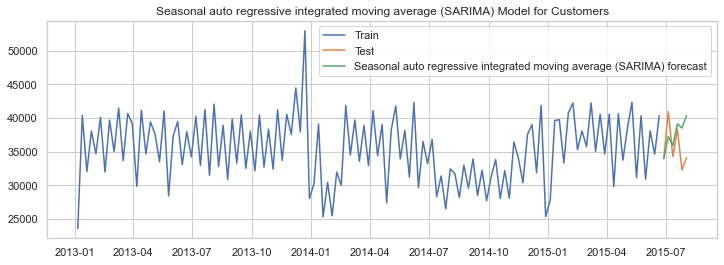

In [151]:
#Forecast for Customers.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index)
df_forecast = pd.DataFrame(df_forecast,columns = ['Customers'])

plt_time_series_1var('Customers', 'Seasonal auto regressive integrated moving average (SARIMA)')

In [152]:
results = cal_rmse_mape(results, 'SARIMA - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   
0                                 SARIMA - Customers  -1843.0708   3108.3544   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424  
0  0.0584   8.9373  1.577423e+07   3971.6789

## M9. SARIMA with Exogenous Variables (SARIMAX)
Time Series Forecasting with Exogenous Variables

In [153]:
#Sales
exog = train[exogvar]

mod = SARIMAX(train['Sales'], order=(2, 0, 1), seasonal_order=(0, 1, 1, 12), exog=exog) 
res = mod.fit()
print(res.params)

Promo                        2.437528e+03
Promo2                       1.954906e+03
SchoolHoliday                5.519066e+01
DayOfWeek                   -1.243106e+03
CompetitionDistance         -1.153509e+00
CompetitionOpenSinceMonth    1.646394e+02
CompetitionOpenSinceYear     6.263777e+00
ar.L1                        1.219745e+00
ar.L2                       -2.277270e-01
ma.L1                       -8.841372e-01
ma.S.L12                    -8.282423e-01
sigma2                       1.304145e+09
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


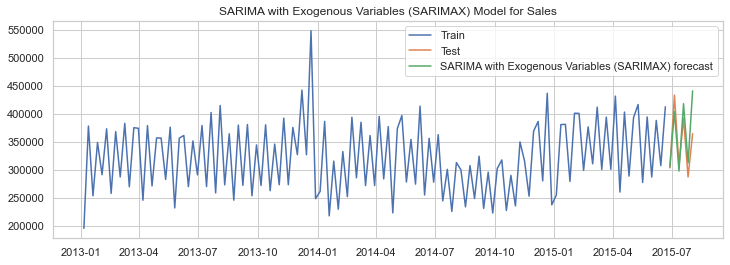

In [154]:
#Forecast for Sales.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index, exog=test[exogvar])
df_forecast = pd.DataFrame(df_forecast,columns = ['Sales'])

plt_time_series_1var('Sales', 'SARIMA with Exogenous Variables (SARIMAX)')

In [155]:
results = cal_rmse_mape(results, 'SARIMAX - Sales', 'Sales')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   
0                                 SARIMA - Customers  -1843.0708   3108.3544   
0                                    SARIMAX - Sales -14949.8889  28310.9809   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424  
0  0.0584   8.9373  1.577423e+07   3971.6789  
0  0.0448   7.8899  1.358934e+09  36863.7207

In [156]:
#Customers
mod = SARIMAX(train['Customers'], order=(2, 0, 1), seasonal_order=(0, 1, 1, 12), exog=train[exogvar]) 
res = mod.fit()
print(res.params)

Promo                        1.617877e+02
Promo2                      -1.077748e+02
SchoolHoliday               -7.923076e+00
DayOfWeek                   -1.075998e+02
CompetitionDistance         -2.028742e-01
CompetitionOpenSinceMonth    3.449808e+01
CompetitionOpenSinceYear     8.935324e-01
ar.L1                        1.237573e+00
ar.L2                       -2.473534e-01
ma.L1                       -8.770069e-01
ma.S.L12                    -8.168609e-01
sigma2                       7.067984e+06
dtype: float64


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


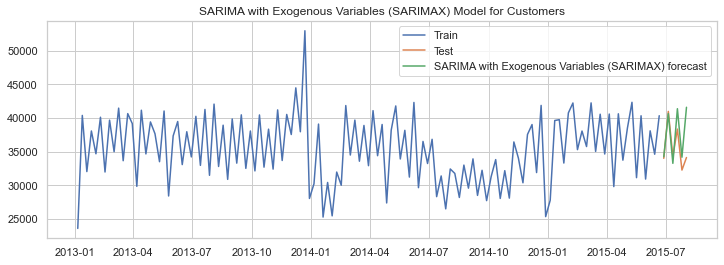

In [157]:
#Forecast for Customers.
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index, exog=test[exogvar])
df_forecast = pd.DataFrame(df_forecast,columns = ['Customers'])

plt_time_series_1var('Customers', 'SARIMA with Exogenous Variables (SARIMAX)')

In [158]:
results = cal_rmse_mape(results, 'SARIMAX - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   
0                                 SARIMA - Customers  -1843.0708   3108.3544   
0                                    SARIMAX - Sales -14949.8889  28310.9809   
0                                SARIMAX - Customers  -1879.7478   2328.1214   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424  
0  0.0584   8.9373  1.577423e+07   3971.6789  
0  0.0448   7.8899  1.358934e+09  36863.7207  
0  0.0543   6.6854  1.160487e+07   3406.5926

## 7.4 VAR (Vector Auto-regression) Model Procedures

### Granger Causality Tests

In [159]:
#from statsmodels.tsa.stattools import grangercausalitytests
v_test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, v_test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][v_test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [160]:
maxlag=1
grangers_causation_matrix(df_sales[endgvar+exogvar], variables = endgvar+exogvar)

Sales_x  Customers_x  Promo_x  Promo2_x  \
Sales_y                       1.0000       0.0000   0.0000    0.0000   
Customers_y                   0.0000       1.0000   0.0000    0.0000   
Promo_y                       0.1186       0.0170   1.0000    0.0063   
Promo2_y                      0.0155       0.0007   0.0770    1.0000   
SchoolHoliday_y               0.0259       0.0297   0.3600    0.5388   
DayOfWeek_y                   0.8416       0.8753   0.7131    0.0000   
CompetitionDistance_y         0.0055       0.0074   0.0921    0.1264   
CompetitionOpenSinceMonth_y   0.0292       0.0346   0.0746    0.0000   
CompetitionOpenSinceYear_y    0.0419       0.0722   0.0814    0.0000   

                             SchoolHoliday_x  DayOfWeek_x  \
Sales_y                               0.0022       0.0000   
Customers_y                           0.0049       0.0000   
Promo_y                               0.0557       0.0030   
Promo2_y                              0.0033       0.0000   
SchoolHoliday_y                       1.0000       0.4429   
DayOfWeek_y                           0.2326       1.0000   
CompetitionDistance_y                 0.6642       0.1612   
CompetitionOpenSinceMonth_y           0.2628       0.0002   
CompetitionOpenSinceYear_y            0.2599       0.0002   

                             CompetitionDistance_x  \
Sales_y                                     0.3062   
Customers_y                                 0.4036   
Promo_y                                     0.0539   
Promo2_y                                    0.0000   
SchoolHoliday_y                             0.1092   
DayOfWeek_y                                 0.0000   
CompetitionDistance_y                       1.0000   
CompetitionOpenSinceMonth_y                 0.0000   
CompetitionOpenSinceYear_y                  0.0000   

                             CompetitionOpenSinceMonth_x  \
Sales_y                                           0.0001   
Customers_y                                       0.0000   
Promo_y                                           0.0044   
Promo2_y                                          0.0000   
SchoolHoliday_y                                   0.3708   
DayOfWeek_y                                       0.1920   
CompetitionDistance_y                             0.2033   
CompetitionOpenSinceMonth_y                       1.0000   
CompetitionOpenSinceYear_y                        0.3717   

                             CompetitionOpenSinceYear_x  
Sales_y                                          0.0001  
Customers_y                                      0.0000  
Promo_y                                          0.0039  
Promo2_y                                         0.0000  
SchoolHoliday_y                                  0.2617  
DayOfWeek_y                                      0.0660  
CompetitionDistance_y                            0.3987  
CompetitionOpenSinceMonth_y                      0.0807  
CompetitionOpenSinceYear_y                       1.0000

### Inference

As per causality matrix shown above for maxlag to 1, the x-axis is the peredictor series and y-axis is the response. If p-value is less than the significance level of 0.05, we reject the null hypothesis and conclude that the variable x is in causuality with variable y.

As per p-value shown, sales_x has causality with Customer_y, Promo2_y, SchoolHoliday_y, and CopetitionDistance_y. Similarily the customer_x value is in casuality with Sales_y, Promo_y, Promo2_y, SchoolHoliday_y and CompetitionDistance_y.  

This makes this system of multi time series a good candidate for using VAR models to forecast.

Next, let’s do the Cointegration test.

### Cointegration - Johansen Test

In [161]:
def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [162]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [163]:
joh_model = coint_johansen(df_sales[endgvar+exogvar],-1,5)
joh_output(joh_model)

# Johansen test for 'n' dependant variable for cointegrating vectors.
# Rank of matrix.
cointegration_test(df_sales[endgvar+exogvar])

   max_eig_stat  trace_stat
0     64.510550  234.233707
1     45.553184  169.723157
2     42.836013  124.169973
3     38.159227   81.333960
4     24.487100   43.174733
5     10.320973   18.687634
6      6.211221    8.366660
7      1.761800    2.155440
8      0.393639    0.393639 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[51.8528 54.9629 61.3449]
 [45.893  48.8795 55.0335]
 [39.9085 42.7679 48.6606]
 [33.9271 36.6301 42.2333]
 [27.916  30.4428 35.7359]
 [21.837  24.1592 29.0609]
 [15.7175 17.7961 22.2519]
 [ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[173.2292 179.5199 191.8122]
 [137.9954 143.6691 154.7977]
 [106.7351 111.7797 121.7375]
 [ 79.5329  83.9383  92.7136]
 [ 56.2839  60.0627  67.6367]
 [ 37.0339  40.1749  46.5716]
 [ 21.7781  24.2761  29.5147]
 [ 10.4741  12.3212  16.364 ]
 [  2.9762   4.1296   6.9406]] 

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Sales  ::  234.2

### Inference:
The Sales are Customers time series has the 95% its critical value of trace_stat, hance these time series are having the cointegrated each other. Henece the order (r) is 3.

In [164]:
coint=coint_johansen(df_sales[endgvar+exogvar],-1,5)
coint.trace_stat
coint.max_eig_stat
traces = coint.lr1
maxeig=coint.lr2
cvts = coint.cvt  ## 0: 90%  1:95% 2: 99%
cvms = coint.cvm   ## 0: 90%  1:95% 2: 99%

N, l = df_sales[endgvar+exogvar].shape

for i in range(l):
    if traces[i] > cvts[i, 1]:
        r = i + 1
print(r)

3


## M10. VAR (Vector Auto-regression) Model

In [165]:
#VAR having two endogenous variables. No exogenous variable.
mod = VAR(endog=train[endgvar])
res=mod.fit(maxlags=12, ic='aic')
res.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Apr, 2021
Time:                     22:21:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    36.2059
Nobs:                     124.000    HQIC:                   35.9088
Log likelihood:          -2543.64    FPE:                3.21471e+15
AIC:                      35.7056    Det(Omega_mle):     2.71217e+15
--------------------------------------------------------------------
Results for equation Sales
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const           104272.552318     59994.410550            1.738           0.082
L1.Sales            -1.920399         0.318683           -6.026           0.000
L1.Customers        20.538164         4.097384            5.013 

In [166]:
aa = mod.select_order(10)
print(aa.summary())
print('AIC result:',aa.aic)

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        36.73       36.78   8.961e+15       36.75
1        35.95      36.09*   4.091e+15       36.00
2        35.89       36.12   3.866e+15      35.99*
3        35.86       36.19   3.766e+15       36.00
4        35.82       36.24   3.588e+15       35.99
5       35.78*       36.29  3.466e+15*       35.99
6        35.83       36.44   3.639e+15       36.08
7        35.89       36.59   3.874e+15       36.17
8        35.93       36.72   4.026e+15       36.25
9        35.97       36.86   4.217e+15       36.33
10       35.89       36.87   3.887e+15       36.29
--------------------------------------------------
AIC result: 5


### Forecast with Selected Order(p)

In [167]:
# Get the lag order
Lag_order = res.k_ar
print('lag order:',Lag_order)

# Input data for forecasting
input_data = train[endgvar].values[-Lag_order:]

# forecasting
df_forecast = res.forecast(y=input_data, exog_future=None, steps=len(test[endgvar]))
df_forecast = (pd.DataFrame(df_forecast, index=test.index, columns=['Sales', 'Customers']))
df_forecast

lag order: 5


Sales     Customers
Date                                   
2015-06-28  258165.869060  29690.645434
2015-07-05  396090.559042  39203.043975
2015-07-12  305896.713456  33690.782093
2015-07-19  348069.349046  35938.155560
2015-07-26  315181.937306  34173.753208
2015-08-02  345597.339088  35970.698272

## Plot of Forecast vs Actuals

In [168]:
def plot_forecast(lst, title):
    rcParams['figure.figsize'] = 20,10
    k=1
    for i in lst:
        ax=plt.subplot(len(lst),2,k)
        plt.plot(train[i], label='Train')
        plt.plot(test[i], label = 'Actual Data')
        plt.plot(df_forecast[i], label = 'Predictions')
        plt.title(title+' Model: '+i, fontsize=15)
        plt.xticks(rotation=45)
        plt.legend(loc='best')
        k +=1

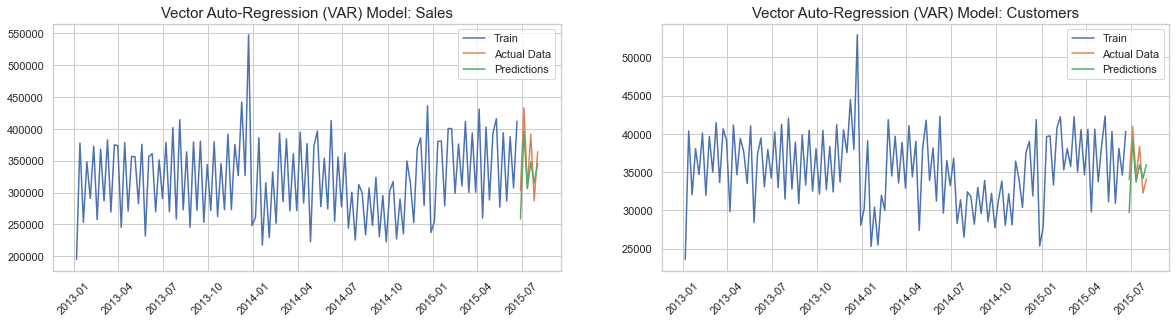

In [169]:
plot_forecast(endgvar, 'Vector Auto-Regression (VAR)')

### Calculate RMSE and MAPE

In [170]:
results = cal_rmse_mape(results, 'VAR - Sales', 'Sales')
results = cal_rmse_mape(results, 'VAR - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   
0                                 SARIMA - Customers  -1843.0708   3108.3544   
0                                    SARIMAX - Sales -14949.8889  28310.9809   
0                                SARIMAX - Customers  -1879.7478   2328.1214   
0                                        VAR - Sales  19600.1522  29036.4646   
0                                    VAR - Customers    884.3202   2138.4707   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424  
0  0.0584   8.9373  1.577423e+07   3971.6789  
0  0.0448   7.8899  1.358934e+09  36863.7207  
0  0.0543   6.6854  1.160487e+07   3406.5926  
0 -0.0506   8.3455  1.069478e+09  32702.8779  
0 -0.0227   6.0535  5.819903e+06   2412.4475

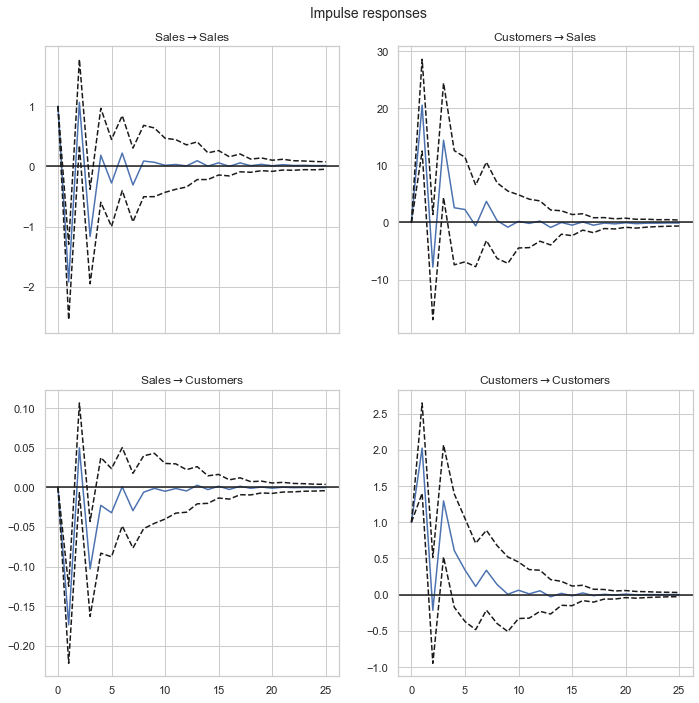

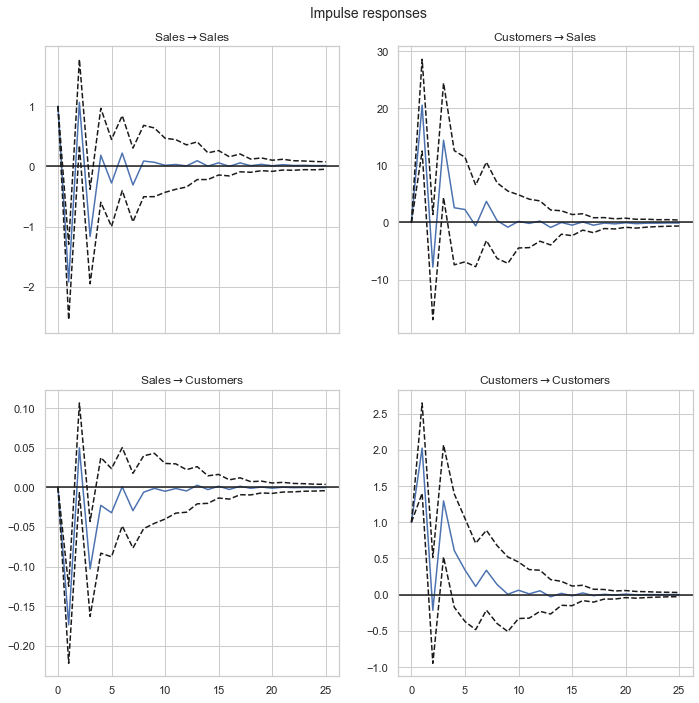

In [171]:
#Impluse responses
irf = res.irf(25)
irf.plot(orth=False)

### Inference

- As shown in the "Sales -> Customers" plot above, for every 1 negative unit change in Sales, Customers decrease by 0.23 units. It takes about 10-15 weeks to return to normal. 

- As shown in the "Customers -> Sales" plot above, for every 1 positive unit change in Customers, Sales increases by 28 units. It takes about 10-15 weeks to return to normal.  

## M11. VAR (Vector Auto-regression) using VARMAX model

In [172]:
# Order (2,0) having two endogenous variables, No exogenous variable
mod = VARMAX(train[endgvar], order=(2,0))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  129
Model:                             VAR(2)   Log Likelihood               -2670.584
                              + intercept   AIC                           5367.168
Date:                    Sun, 04 Apr 2021   BIC                           5404.345
Time:                            22:21:54   HQIC                          5382.274
Sample:                        01-06-2013                                         
                             - 06-21-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                61.90, 40.79   Jarque-Bera (JB):          12.99, 7.53
Prob(Q):                        0.01, 0.44   Prob(JB):                   0.00, 0.02
Heteroskedasticity (H):         2.16, 1.33   Skew:                      0.68, -0.53
P

In [173]:
#from datetime import datetime
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index, exog=None, dynamic=False)

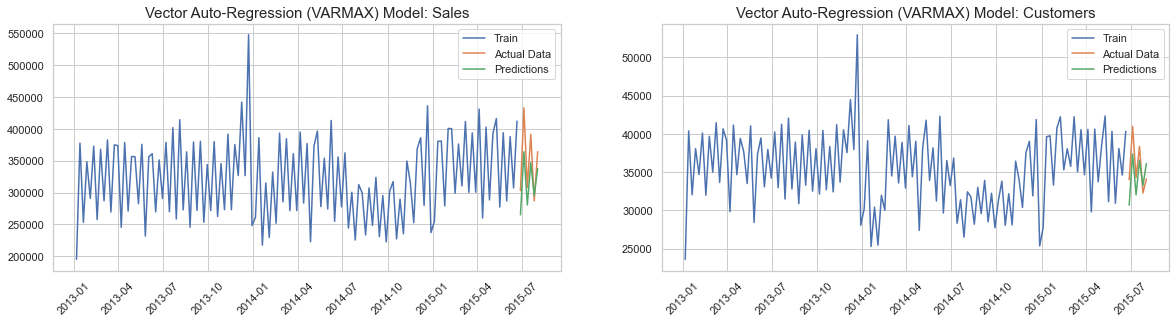

In [174]:
plot_forecast(endgvar, 'Vector Auto-Regression (VARMAX)')

In [175]:
results = cal_rmse_mape(results, 'VAR - Sales using VARMAX', 'Sales')
results = cal_rmse_mape(results, 'VAR - Customers using VARMAX', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   
0                                 SARIMA - Customers  -1843.0708   3108.3544   
0                                    SARIMAX - Sales -14949.8889  28310.9809   
0                                SARIMAX - Customers  -1879.7478   2328.1214   
0                                        VAR - Sales  19600.1522  29036.4646   
0                                    VAR - Customers    884.3202   2138.4707   
0                           VAR - Sales using VARMAX  32947.9592  35730.7673   
0                       VAR - Customers using VARMAX   1330.9978   2325.9849   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424  
0  0.0584   8.9373  1.577423e+07   3971.6789  
0  0.0448   7.8899  1.358934e+09  36863.7207  
0  0.0543   6.6854  1.160487e+07   3406.5926  
0 -0.0506   8.3455  1.069478e+09  32702.8779  
0 -0.0227   6.0535  5.819903e+06   2412.4475  
0 -0.0888   9.8511  1.625324e+09  40315.3034  
0 -0.0348   6.4544  6.204041e+06   2490.7913

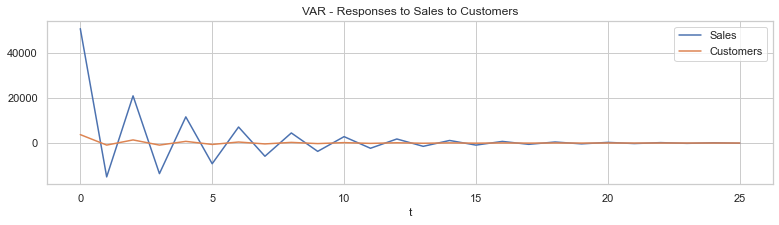

In [176]:
ax = res.impulse_responses(25, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='VAR - Responses to Sales to Customers');

### Inferences
- As shown in the "VAR Sales to Customers" plot above, there seems to be a lot of variation at the start. 1 time period of change causes 60k+ loss in sales and customers lose about 3-4k. In this plot it takes about 10-15 time periods before the sales achieves its normal value. 



## M12. Vector Moving Average (VMA) Model

In [177]:
#VMA having two endogenous variables, No exogenous variable
# fit VMA model by setting the order (0,2)
mod = VARMAX(train[endgvar], order=(0,2), error_cov_type='diagonal')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  129
Model:                             VMA(2)   Log Likelihood               -2827.695
                              + intercept   AIC                           5679.390
Date:                    Sun, 04 Apr 2021   BIC                           5713.707
Time:                            22:22:03   HQIC                          5693.334
Sample:                        01-06-2013                                         
                             - 06-21-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                46.21, 33.22   Jarque-Bera (JB):          12.13, 4.98
Prob(Q):                        0.23, 0.77   Prob(JB):                   0.00, 0.08
Heteroskedasticity (H):         2.15, 2.46   Skew:                       0.56, 0.37
P

In [178]:
#from datetime import datetime
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index, dynamic=False)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


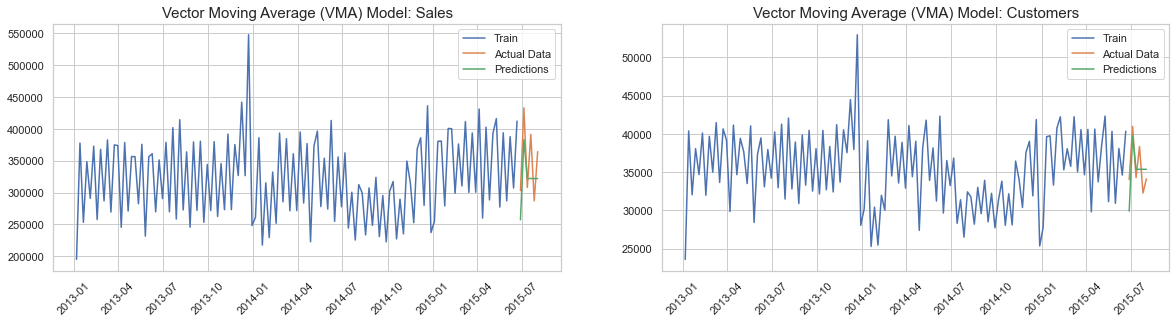

In [179]:
plot_forecast(endgvar, 'Vector Moving Average (VMA)')

In [180]:
results = cal_rmse_mape(results, 'VMA - Sales', 'Sales')
results = cal_rmse_mape(results, 'VMA - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   
0                                 SARIMA - Customers  -1843.0708   3108.3544   
0                                    SARIMAX - Sales -14949.8889  28310.9809   
0                                SARIMAX - Customers  -1879.7478   2328.1214   
0                                        VAR - Sales  19600.1522  29036.4646   
0                                    VAR - Customers    884.3202   2138.4707   
0                           VAR - Sales using VARMAX  32947.9592  35730.7673   
0                       VAR - Customers using VARMAX   1330.9978   2325.9849   
0                                        VMA - Sales  26371.4843  42752.0057   
0                                    VMA - Customers    478.7597   2290.4108   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424  
0  0.0584   8.9373  1.577423e+07   3971.6789  
0  0.0448   7.8899  1.358934e+09  36863.7207  
0  0.0543   6.6854  1.160487e+07   3406.5926  
0 -0.0506   8.3455  1.069478e+09  32702.8779  
0 -0.0227   6.0535  5.819903e+06   2412.4475  
0 -0.0888   9.8511  1.625324e+09  40315.3034  
0 -0.0348   6.4544  6.204041e+06   2490.7913  
0 -0.0653  12.1284  2.104323e+09  45872.9055  
0 -0.0106   6.5438  6.590065e+06   2567.1122

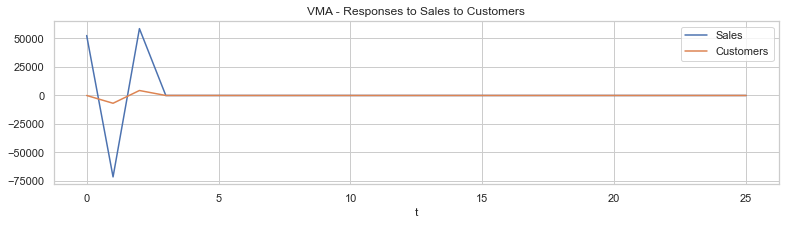

In [181]:
ax = res.impulse_responses(25, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='VMA - Responses to Sales to Customers');

### Inferences
- As shown in the "VMA Sales to Customers" plot above, 1 time period of change leads to 120k+ loss in sales and the customer side is down by 5-6k. Here it takes about 10-15 time periods before the sales return to their normal value. 



## M13. Vector Auto Regression Moving Average (VARMA) Model

In [182]:
#VARMA(p,q) is (2,1)
mod = VARMAX(train[endgvar], order=(2,1))
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  129
Model:                         VARMA(2,1)   Log Likelihood               -2667.318
                              + intercept   AIC                           5368.635
Date:                    Sun, 04 Apr 2021   BIC                           5417.252
Time:                            22:22:10   HQIC                          5388.389
Sample:                        01-06-2013                                         
                             - 06-21-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                59.58, 27.13   Jarque-Bera (JB):          15.21, 5.27
Prob(Q):                        0.02, 0.94   Prob(JB):                   0.00, 0.07
Heteroskedasticity (H):         2.21, 1.46   Skew:                      0.70, -0.43
P

In [183]:
#from datetime import datetime
start_index = test.index.min()
end_index = test.index.max()
df_forecast = mod.fit().predict(start=start_index, end=end_index, dynamic=False)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


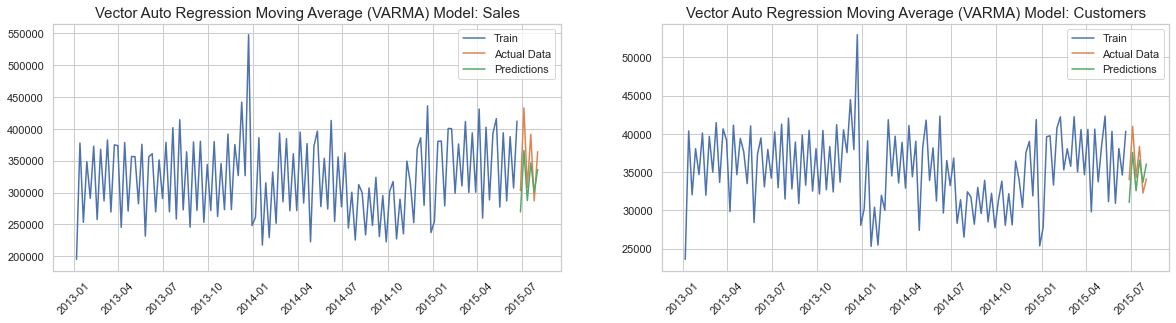

In [184]:
plot_forecast(endgvar, 'Vector Auto Regression Moving Average (VARMA)')

In [185]:
results = cal_rmse_mape(results, 'VARMA - Sales', 'Sales')
results = cal_rmse_mape(results, 'VARMA - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   
0                                 SARIMA - Customers  -1843.0708   3108.3544   
0                                    SARIMAX - Sales -14949.8889  28310.9809   
0                                SARIMAX - Customers  -1879.7478   2328.1214   
0                                        VAR - Sales  19600.1522  29036.4646   
0                                    VAR - Customers    884.3202   2138.4707   
0                           VAR - Sales using VARMAX  32947.9592  35730.7673   
0                       VAR - Customers using VARMAX   1330.9978   2325.9849   
0                                        VMA - Sales  26371.4843  42752.0057   
0                                    VMA - Customers    478.7597   2290.4108   
0                                      VARMA - Sales  29999.6633  34673.6644   
0                                  VARMA - Customers   1082.5592   2201.0137   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424  
0  0.0584   8.9373  1.577423e+07   3971.6789  
0  0.0448   7.8899  1.358934e+09  36863.7207  
0  0.0543   6.6854  1.160487e+07   3406.5926  
0 -0.0506   8.3455  1.069478e+09  32702.8779  
0 -0.0227   6.0535  5.819903e+06   2412.4475  
0 -0.0888   9.8511  1.625324e+09  40315.3034  
0 -0.0348   6.4544  6.204041e+06   2490.7913  
0 -0.0653  12.1284  2.104323e+09  45872.9055  
0 -0.0106   6.5438  6.590065e+06   2567.1122  
0 -0.0792   9.5463  1.503518e+09  38775.2268  
0 -0.0276   6.1191  5.365103e+06   2316.2692

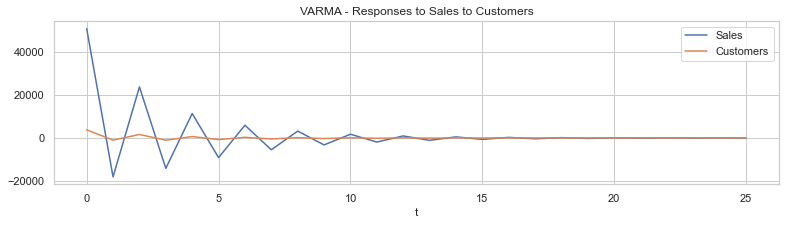

In [186]:
ax = res.impulse_responses(25, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='VARMA - Responses to Sales to Customers');

### Inferences
- As shown in the "VARMA Sales to Customers" plot above, 1 time period of change leads to approximately 70k loss in sales and 2-4k loss in customers. It takes about 10-15 time periods before the sales revert back to its normal value. 


## M14. Vector Autoregression Moving-Average with Exogenous Regressors (VARMAX) model

In [187]:
# Define exogenous variables
exog = train[exogvar]
exog1 = test[exogvar]

#VARMAX(p,q) having two endogenous variables with exogenous variables.
mod = VARMAX(train[endgvar], exog=exog, order=(2,0), trend='n')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  129
Model:                            VARX(2)   Log Likelihood               -2684.232
Date:                    Sun, 04 Apr 2021   AIC                           5418.465
Time:                            22:22:18   BIC                           5489.960
Sample:                        01-06-2013   HQIC                          5447.515
                             - 06-21-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                55.35, 43.88   Jarque-Bera (JB):          51.92, 3.09
Prob(Q):                        0.05, 0.31   Prob(JB):                   0.00, 0.21
Heteroskedasticity (H):         1.09, 1.15   Skew:                      -0.24, 0.10
Prob(H) (two-sided):            0.79, 0.65   Kurtosis:                   6.07, 3.73


In [188]:
#Predict
start_index = test.index.min()
end_index = test.index.max()
mod_fit = mod.fit()
df_forecast = mod_fit.predict(start=start_index, end=end_index, exog=exog1, dynamic=False)

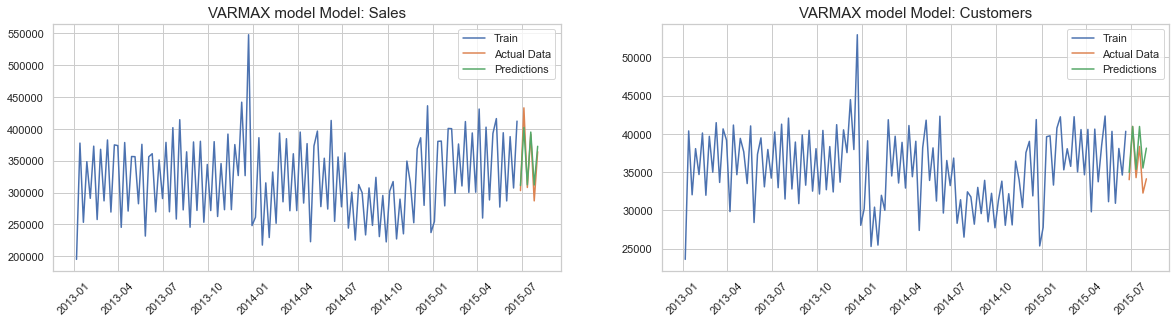

In [189]:
plot_forecast(endgvar, 'VARMAX model')

In [190]:
results = cal_rmse_mape(results, 'VARMAX - Sales', 'Sales')
results = cal_rmse_mape(results, 'VARMAX - Customers', 'Customers')
results

Model        Bias         MAE  \
0        Holt's exponential smoothing method - Sales  -2631.2591  47808.8549   
0    Holt's exponential smoothing method - Customers  -1016.3223   3037.4202   
0           Holt Winters's additive forecast - Sales -20086.5867  58179.7833   
0       Holt Winters's additive forecast - Customers  -1935.8536   3144.3591   
0     Holt Winters's mulitplicative forecast - Sales -24718.0357  61080.8183   
0  Holt Winters's mulitplicative forecast - Custo...  -2877.4216   4318.5411   
0                                         AR - Sales  16400.6178  26363.7778   
0                                     AR - Customers    -36.3314   1779.8014   
0                                         MA - Sales  24088.7792  41081.1693   
0                                     MA - Customers     24.2975   2235.5909   
0                                       ARMA - Sales  15513.2550  30097.4038   
0                                   ARMA - Customers   -201.8307   1939.7699   
0                                      ARIMA - Sales  15513.2550  30097.4038   
0                                  ARIMA - Customers   -201.8307   1939.7699   
0                                     SARIMA - Sales  -6759.9719  31213.7248   
0                                 SARIMA - Customers  -1843.0708   3108.3544   
0                                    SARIMAX - Sales -14949.8889  28310.9809   
0                                SARIMAX - Customers  -1879.7478   2328.1214   
0                                        VAR - Sales  19600.1522  29036.4646   
0                                    VAR - Customers    884.3202   2138.4707   
0                           VAR - Sales using VARMAX  32947.9592  35730.7673   
0                       VAR - Customers using VARMAX   1330.9978   2325.9849   
0                                        VMA - Sales  26371.4843  42752.0057   
0                                    VMA - Customers    478.7597   2290.4108   
0                                      VARMA - Sales  29999.6633  34673.6644   
0                                  VARMA - Customers   1082.5592   2201.0137   
0                                     VARMAX - Sales  -3055.4447  13318.1281   
0                                 VARMAX - Customers  -1986.2590   1992.3096   

      MPE     MAPE           MSE        RMSE  
0  0.0303  13.9458  2.816789e+09  53073.4261  
0  0.0356   8.5797  1.043960e+07   3231.0366  
0  0.0857  17.6092  4.391264e+09  66266.6139  
0  0.0603   9.0529  1.183586e+07   3440.3291  
0  0.1004  18.6408  4.964534e+09  70459.4473  
0  0.0899  12.5088  2.385403e+07   4884.0584  
0 -0.0370   7.1468  1.026970e+09  32046.3783  
0  0.0056   4.9185  4.265390e+06   2065.2820  
0 -0.0529  11.0827  2.409191e+09  49083.5066  
0  0.0049   6.1674  6.205849e+06   2491.1542  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0 -0.0322   8.2396  1.294229e+09  35975.3913  
0  0.0105   5.4013  4.907261e+06   2215.2338  
0  0.0349   9.2601  1.750062e+09  41833.7424  
0  0.0584   8.9373  1.577423e+07   3971.6789  
0  0.0448   7.8899  1.358934e+09  36863.7207  
0  0.0543   6.6854  1.160487e+07   3406.5926  
0 -0.0506   8.3455  1.069478e+09  32702.8779  
0 -0.0227   6.0535  5.819903e+06   2412.4475  
0 -0.0888   9.8511  1.625324e+09  40315.3034  
0 -0.0348   6.4544  6.204041e+06   2490.7913  
0 -0.0653  12.1284  2.104323e+09  45872.9055  
0 -0.0106   6.5438  6.590065e+06   2567.1122  
0 -0.0792   9.5463  1.503518e+09  38775.2268  
0 -0.0276   6.1191  5.365103e+06   2316.2692  
0  0.0147   3.8379  2.890178e+08  17000.5244  
0  0.0577   5.7883  5.939740e+06   2437.1582

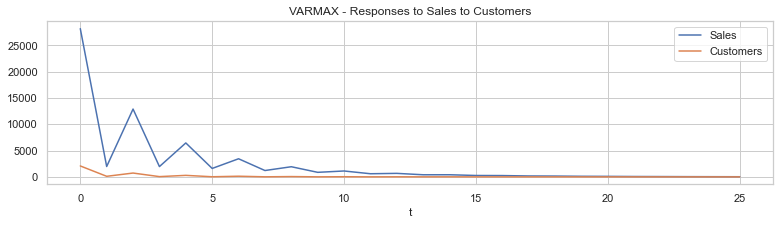

In [191]:
ax = res.impulse_responses(25, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='VARMAX - Responses to Sales to Customers');

### Inferences
- As shown in the "Sales to Customers" plot above, 1 time period of change leads to 20k+ loss in sales and 2k loss in customers. It takes about 10-15 time periods before the sales revert back to its normal value. 


In [192]:
results['RowNum'] = (list(range(1, len(results)+1)))
results = results.set_index('RowNum')
results.sort_values(by='MAPE')

Model        Bias  \
RowNum                                                                  
27                                         VARMAX - Sales  -3055.4447   
8                                          AR - Customers    -36.3314   
14                                      ARIMA - Customers   -201.8307   
12                                       ARMA - Customers   -201.8307   
28                                     VARMAX - Customers  -1986.2590   
20                                        VAR - Customers    884.3202   
26                                      VARMA - Customers   1082.5592   
10                                         MA - Customers     24.2975   
22                           VAR - Customers using VARMAX   1330.9978   
24                                        VMA - Customers    478.7597   
18                                    SARIMAX - Customers  -1879.7478   
7                                              AR - Sales  16400.6178   
17                                        SARIMAX - Sales -14949.8889   
11                                           ARMA - Sales  15513.2550   
13                                          ARIMA - Sales  15513.2550   
19                                            VAR - Sales  19600.1522   
2         Holt's exponential smoothing method - Customers  -1016.3223   
16                                     SARIMA - Customers  -1843.0708   
4            Holt Winters's additive forecast - Customers  -1935.8536   
15                                         SARIMA - Sales  -6759.9719   
25                                          VARMA - Sales  29999.6633   
21                               VAR - Sales using VARMAX  32947.9592   
9                                              MA - Sales  24088.7792   
23                                            VMA - Sales  26371.4843   
6       Holt Winters's mulitplicative forecast - Custo...  -2877.4216   
1             Holt's exponential smoothing method - Sales  -2631.2591   
3                Holt Winters's additive forecast - Sales -20086.5867   
5          Holt Winters's mulitplicative forecast - Sales -24718.0357   

               MAE     MPE     MAPE           MSE        RMSE  
RowNum                                                         
27      13318.1281  0.0147   3.8379  2.890178e+08  17000.5244  
8        1779.8014  0.0056   4.9185  4.265390e+06   2065.2820  
14       1939.7699  0.0105   5.4013  4.907261e+06   2215.2338  
12       1939.7699  0.0105   5.4013  4.907261e+06   2215.2338  
28       1992.3096  0.0577   5.7883  5.939740e+06   2437.1582  
20       2138.4707 -0.0227   6.0535  5.819903e+06   2412.4475  
26       2201.0137 -0.0276   6.1191  5.365103e+06   2316.2692  
10       2235.5909  0.0049   6.1674  6.205849e+06   2491.1542  
22       2325.9849 -0.0348   6.4544  6.204041e+06   2490.7913  
24       2290.4108 -0.0106   6.5438  6.590065e+06   2567.1122  
18       2328.1214  0.0543   6.6854  1.160487e+07   3406.5926  
7       26363.7778 -0.0370   7.1468  1.026970e+09  32046.3783  
17      28310.9809  0.0448   7.8899  1.358934e+09  36863.7207  
11      30097.4038 -0.0322   8.2396  1.294229e+09  35975.3913  
13      30097.4038 -0.0322   8.2396  1.294229e+09  35975.3913  
19      29036.4646 -0.0506   8.3455  1.069478e+09  32702.8779  
2        3037.4202  0.0356   8.5797  1.043960e+07   3231.0366  
16       3108.3544  0.0584   8.9373  1.577423e+07   3971.6789  
4        3144.3591  0.0603   9.0529  1.183586e+07   3440.3291  
15      31213.7248  0.0349   9.2601  1.750062e+09  41833.7424  
25      34673.6644 -0.0792   9.5463  1.503518e+09  38775.2268  
21      35730.7673 -0.0888   9.8511  1.625324e+09  40315.3034  
9       41081.1693 -0.0529  11.0827  2.409191e+09  49083.5066  
23      42752.0057 -0.0653  12.1284  2.104323e+09  45872.9055  
6        4318.5411  0.0899  12.5088  2.385403e+07   4884.0584  
1       47808.8549  0.0303  13.9458  2.816789e+09  53073.4261  
3       58179.7833  0.0857  17.6092  4.391264e+09  66266.6139  
5    

# 8. Model Evaluation

In [193]:
results.sort_values(by='MAPE').head()

Model       Bias         MAE     MPE    MAPE  \
RowNum                                                              
27          VARMAX - Sales -3055.4447  13318.1281  0.0147  3.8379   
8           AR - Customers   -36.3314   1779.8014  0.0056  4.9185   
14       ARIMA - Customers  -201.8307   1939.7699  0.0105  5.4013   
12        ARMA - Customers  -201.8307   1939.7699  0.0105  5.4013   
28      VARMAX - Customers -1986.2590   1992.3096  0.0577  5.7883   

                 MSE        RMSE  
RowNum                            
27      2.890178e+08  17000.5244  
8       4.265390e+06   2065.2820  
14      4.907261e+06   2215.2338  
12      4.907261e+06   2215.2338  
28      5.939740e+06   2437.1582

Text(0, 0.5, 'MAPE')

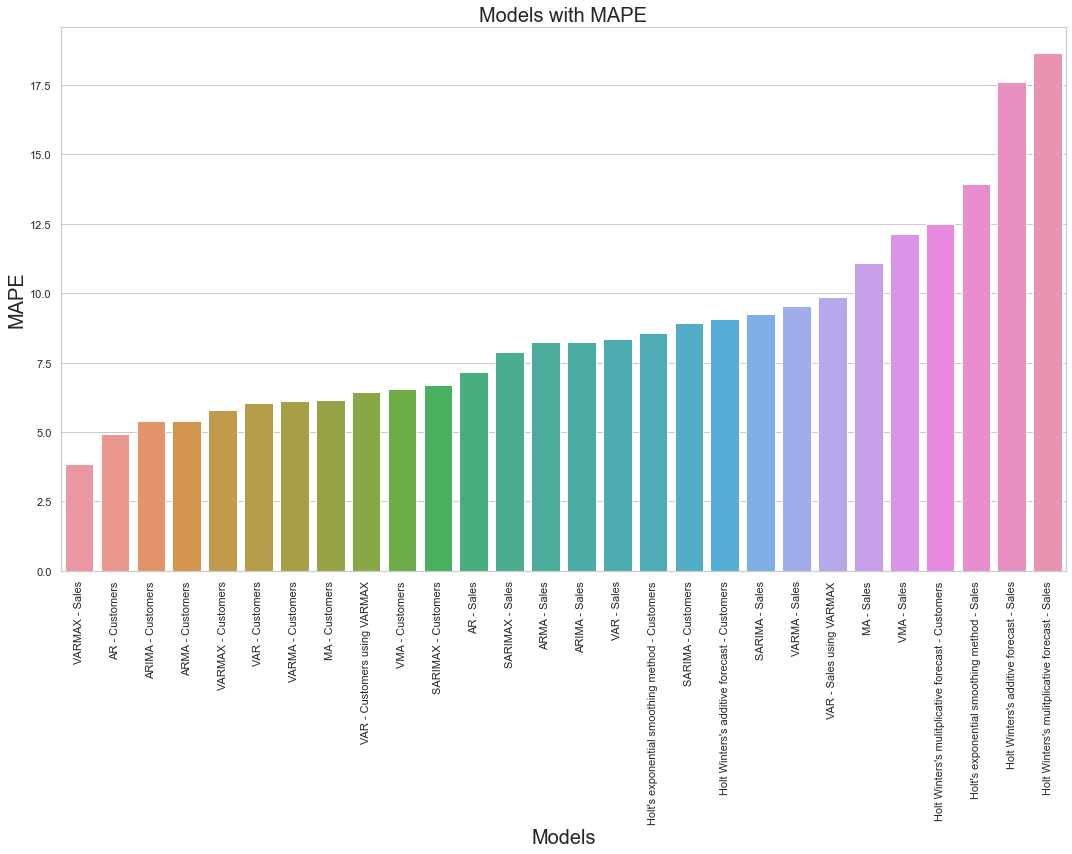

In [194]:
ax=plt.figure(figsize=(18,10))
results = results.sort_values(by='MAPE')
sns.barplot(x = 'Model', y = 'MAPE', hue = None, data = results)
plt.xticks(rotation=90);
plt.title("Models with MAPE", fontsize=20)
plt.xlabel('Models', fontsize=20)
plt.ylabel('MAPE', fontsize=20)

### Conclusion
After performing various tests on the models above (plot is categorized by lowest MAPE values):

VARMAX model for Sales looks promising model for Sales forecasting as it shows the most accurate forecasting, since it has one of the lowest MAPE values. This is evidently shown in the chart above with the VARMAX model having **3.8379** MAPE value. Hence this is the most suitable model for future predictions and forecasting. 

For Customers forecasting the VARMAX model is best suited for the future prediction, having **5.7883** MAPE value. Although it may not have the lowest MAPE value among the customers, but it still the best because it is multivariate dataset as compared to SARIMAX model, which predicts the univariate time series data.

## 9. Final Future model prediction

Since the model has been trained with the train data set and predicted for the next 6 week with the test data, now we will be predicted for beyond 6 weeks data, hence I will be fitting the entire data with below define parameters.

In [195]:
# Future 6 weeks forecasting on VARMAX (endog+exog)
# Consider the parameter for (p,q) is (2,0).
mod = VARMAX(df_sales[endgvar], exog=df_sales[exogvar], order=(2,0))
mod_fit = mod.fit(maxiter=1000, disp=False)

# Future 6 weeks
n_periods = 6

start_index = df_sales.index.min()
end_index = df_sales.index.max()
exog=  df_sales[exogvar]

exog_forecast = exog
future_forecast = mod_fit.get_forecast(steps=n_periods,exog=exog_forecast[-n_periods:])
future_forecast_means = future_forecast.predicted_mean
summary_sales = future_forecast.summary_frame(endog=0, alpha=0.05) 
summary_customers = future_forecast.summary_frame(endog=1, alpha=0.05) 

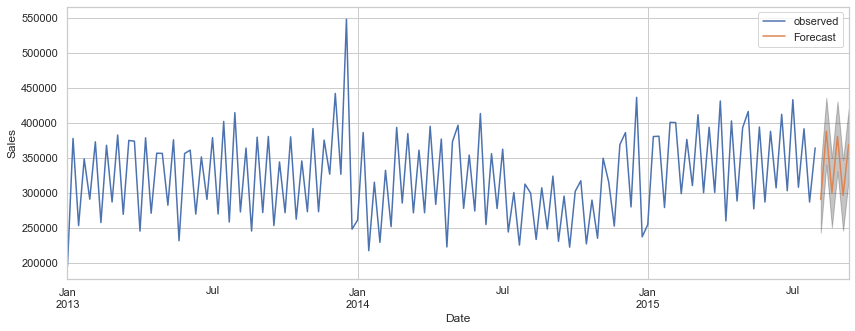

Sales                mean       mean_se  mean_ci_lower  mean_ci_upper
2015-08-09  290564.046525  24185.125330  243162.071918  337966.021133
2015-08-16  388076.653125  24317.893627  340414.457436  435738.848814
2015-08-23  300536.842894  25423.660710  250707.383547  350366.302242
2015-08-30  380649.979092  25447.239268  330774.306621  430525.651563
2015-09-06  296439.521918  25689.429088  246089.166122  346789.877713
2015-09-13  369089.319479  25719.684203  318679.664747  419498.974210

In [196]:
ax = df_sales['Sales'].plot(label='observed', figsize=(14, 5))
future_forecast_means['Sales'].plot(ax=ax, label='Forecast')
ax.fill_between(summary_sales.index,
                summary_sales.iloc[:, 2],
                summary_sales.iloc[:, 3], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

summary_sales[end_index:]

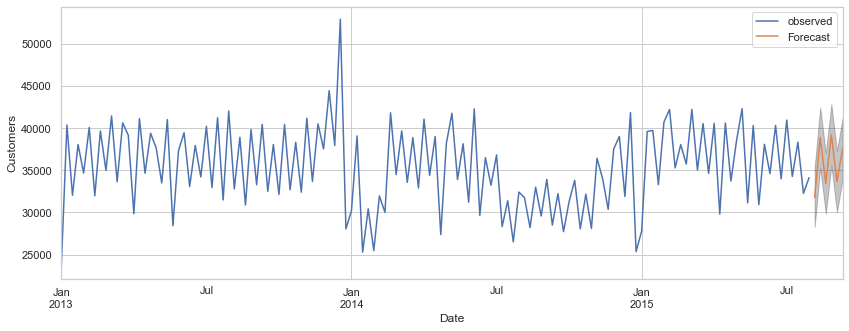

Customers           mean      mean_se  mean_ci_lower  mean_ci_upper
2015-08-09  31798.362936  1797.942168   28274.461041   35322.264831
2015-08-16  38886.743141  1827.937304   35304.051860   42469.434422
2015-08-23  33448.677969  1844.871915   29832.795460   37064.560478
2015-08-30  39231.652177  1852.010944   35601.777427   42861.526926
2015-09-06  33662.599268  1852.233416   30032.288483   37292.910053
2015-09-13  37558.935738  1854.918534   33923.362217   41194.509259

In [197]:
ax = df_sales['Customers'].plot(label='observed', figsize=(14, 5))
future_forecast_means['Customers'].plot(ax=ax, label='Forecast')
ax.fill_between(summary_customers.index,
                summary_customers.iloc[:, 2],
                summary_customers.iloc[:, 3], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Customers')

plt.legend()
plt.show()

summary_customers[end_index:]

In [198]:
print(mod_fit.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                  135
Model:                            VARX(2)   Log Likelihood               -2822.282
                              + intercept   AIC                           5698.564
Date:                    Sun, 04 Apr 2021   BIC                           5777.007
Time:                            22:22:34   HQIC                          5730.441
Sample:                        01-06-2013                                         
                             - 08-02-2015                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                42.61, 56.76   Jarque-Bera (JB):         147.07, 0.43
Prob(Q):                        0.36, 0.04   Prob(JB):                   0.00, 0.81
Heteroskedasticity (H):         0.94, 1.73   Skew:                      -0.21, 0.13
P

### Forecast evaluation

In [199]:
from statsmodels.tsa.stattools import acf
def adjust(val, length= 6): return str(val).ljust(length)
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse})

print('Forecast Accuracy of: Sales')
accuracy_prod = forecast_accuracy(future_forecast_means['Sales'].values, test['Sales'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))
print('-'*20)
print('Forecast Accuracy of: Customers')
accuracy_prod = forecast_accuracy(future_forecast_means['Customers'].values, test['Customers'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: Sales
mape   :  4.0597
me     :  -10207.7195
mae    :  15030.6666
mpe    :  -0.025
rmse   :  20284.3245
--------------------
Forecast Accuracy of: Customers
mape   :  5.1168
me     :  102.3285
mae    :  1806.0672
mpe    :  0.0046
rmse   :  2017.9549


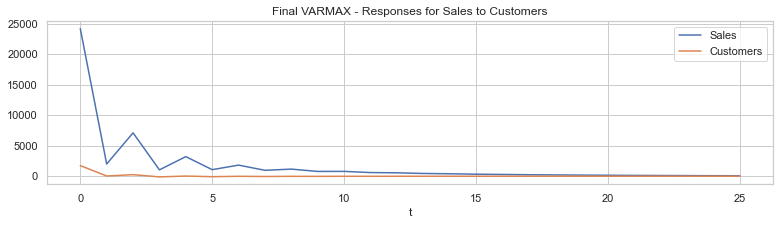

In [200]:
ax = mod_fit.impulse_responses(25, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Final VARMAX - Responses for Sales to Customers');

### Inference
As per the impulse responses plot shown that if there is one time period change, the sales drop by 20K+ and also customers drop by 2k. It takes approximately 10 to 15 time periods to attain normal value. There is not much notable changes in customers as it is normal tendency.

# 10. Conclusion

Overall, we produced a promising time series model prediction by using the VARMAX Model with the lowest MAPE value for both Sales and Customers. We successfully forecasted the prediction for the future 6 weeks.

As part of our systematics building process steps, we started with data cleaning, then Imputed the missing values, outlier treatments, created the derived variables, and at the data preparation stage we convert time series to a weekly basis. Also we performed a test for non-stationarity using the ADF test. Next, we determined if the dataset is stationary. Since the data was stationary, we specified the VAR model in levels. We've also defined endogenous and exogenous variables. Granger causality test was also performed and found that there is a causality between Sales and Customer. Next, we performed the Johansen test, which resulted in a rank 3 time series variable with an order to sales and customer. We've initiated 14 models, starting with the Holt's exponential smoothing technique to the VARMAX model. Afterward, we've found the Impulse Response Function and concluded with the predictions for the next 6 weeks.

## Questions and Answers

1. Sales and Customers are stationary.

2. After performing the Johansen cointegration test, customers and sales were found to be cointegrated.

3. The impact of the number of customers on sales is a positive correlation. As per the final impulse response plot shown above, 1 time period of change results in approximately `20k (24,190)` loss in sales and about `2k (1,729)` loss in customers can be observed. 


                               coef    std err          z      P>|z|      [0.025      0.975]
`--------------------------------------------------------------------------------------------
sqrt.var.Sales            2.419e+04    897.717     26.941      0.000    2.24e+04    2.59e+04
sqrt.cov.Sales.Customers  1729.8042     46.571     37.143      0.000    1638.526    1821.082
sqrt.var.Customers         490.2791     18.101     27.085      0.000     454.801     525.757
`

4. The impact of promo and promo2 is also a positive correlation. 1 unit of promo increase will result in approximately `1242.85` unit increase in sales. Similarly, for 1 unit increase in promo2, there is a `1242.97` unit increase in sales.



5. After forecasting sales for the next 6 weeks, the MAPE accuracy derived is `4.05` as shown below.  
`
Forecast Accuracy of: Sales
mape   :  4.0597
me     :  -10207.7195
mae    :  15030.6666
mpe    :  -0.025
rmse   :  20284.3245
`

6. As per below `Evidence for #6` if we consider the promo2 on the prevous day sales, then 1 unit changes in promo2 will affect if `-90.5736` units of Sales.

7. Independent variables with long-term impact on sales include School holidays and Competitive Distance. Whereas the short-term variables include promo and promo2.

### Evidence for #6 
Let’s say promo2 is decided based on the sales in the previous day. How do you measure the impact of promo2 on sales and the impact of sales on promo2

In [201]:
# Copy the orginal date.
df_sales_prev = df_train_store.copy()

In [202]:
# Find previous day sales.
df_sales_prev['Sales'] = df_sales_prev['Sales'].shift(-1)
df_sales_prev.head()

Store  DayOfWeek   Sales  Customers  Promo  SchoolHoliday  Year  \
Date                                                                          
2015-07-31      1          5  5020.0      555.0      1       2.042917  2015   
2015-07-30      1          4  4782.0      546.0      1       2.042917  2015   
2015-07-29      1          3  5011.0      523.0      1       2.042917  2015   
2015-07-28      1          2  6102.0      560.0      1       2.042917  2015   
2015-07-27      1          1  4364.0      612.0      1       2.042917  2015   

            Month  Day  WeekOfYear  SalePerCustomer  StoreType  Assortment  \
Date                                                                         
2015-07-31      7   31          31         9.482883          2           0   
2015-07-30      7   30          31         9.194139          2           0   
2015-07-29      7   29          31         9.143403          2           0   
2015-07-28      7   28          31         8.948214          2           0   
2015-07-27      7   27          31         9.970588          2           0   

            CompetitionDistance  CompetitionOpenSinceMonth  \
Date                                                         
2015-07-31               1270.0                        9.0   
2015-07-30               1270.0                        9.0   
2015-07-29               1270.0                        9.0   
2015-07-28               1270.0                        9.0   
2015-07-27               1270.0                        9.0   

            CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Date                                                            
2015-07-31                    2008.0       0        -0.658484   
2015-07-30                    2008.0       0        -0.658484   
2015-07-29                    2008.0       0        -0.658484   
2015-07-28                    2008.0       0        -0.658484   
2015-07-27                    2008.0       0        -0.658484   

            Promo2SinceYear  PromoInterval0  PromoInterval1  PromoInterval2  \
Date                                                                          
2015-07-31              0.0       -0.658141             0.0             0.0   
2015-07-30              0.0       -0.658141             0.0             0.0   
2015-07-29              0.0       -0.658141             0.0             0.0   
2015-07-28              0.0       -0.658141             0.0             0.0   
2015-07-27              0.0       -0.658141             0.0             0.0   

            PromoInterval3  
Date                        
2015-07-31             0.0  
2015-07-30             0.0  
2015-07-29             0.0  
2015-07-28             0.0  
2015-07-27             0.0

In [203]:
# Future 6 weeks forecasting on VARMAX (endog+exog) with previous day sales.
# Consider the parameter for (p,q) is (2,0).
mod = VARMAX(df_sales_prev[endgvar], exog=df_sales_prev[exogvar], order=(2,0))
mod_fit = mod.fit(maxiter=50, disp=False)

# Future 6 weeks
n_periods = 6*7

start_index = df_sales_prev.index.min()
end_index = df_sales_prev.index.max()
exog=  df_sales_prev[exogvar]

exog_forecast = exog
future_forecast = mod_fit.get_forecast(steps=n_periods,exog=exog_forecast[-n_periods:])
future_forecast_means = future_forecast.predicted_mean
summary_sales = future_forecast.summary_frame(endog=0, alpha=0.05) 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [204]:
print(mod_fit.summary())

                             Statespace Model Results                             
Dep. Variable:     ['Sales', 'Customers']   No. Observations:                 6679
Model:                            VARX(2)   Log Likelihood              -96483.099
                              + intercept   AIC                         193020.198
Date:                    Sun, 04 Apr 2021   BIC                         193203.979
Time:                            22:24:14   HQIC                        193083.676
Sample:                                 0                                         
                                   - 6679                                         
Covariance Type:                      opg                                         
Ljung-Box (Q):                nan, 4726.83   Jarque-Bera (JB):     2083.10, 4785.24
Prob(Q):                         nan, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.90, 0.98   Skew:                      0.19, -0.20
P